#                                           Phase #1

# 1. Dataset data exploration: List the main finding of the dataset. Be thorough and creative.


In [80]:

# import pandas as pd
import numpy as np
import gzip
import json
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
def load_data(file_name):
    with gzip.open(file_name, 'r') as f:
        data = [json.loads(line) for line in f]
    return pd.DataFrame(data)

# Load the "All Beauty" dataset
df = load_data(r"C:/Users/chitr/OneDrive - Centennial College/Attachment Winter 2024/COMP 262\Project/All_Beauty_5.json.gz")





In [81]:
import pandas as pd

# Assuming 'data' is a dictionary with tabular data
df = pd.DataFrame(df)

df.describe()

,overall,unixReviewTime
count,5269.000000,5.269000e+03
mean,4.771873,1.441506e+09
std,0.743204,5.473127e+07
min,1.000000,1.095725e+09
25%,5.000000,1.407024e+09
50%,5.000000,1.445645e+09
75%,5.000000,1.481674e+09
max,5.000000,1.534982e+09


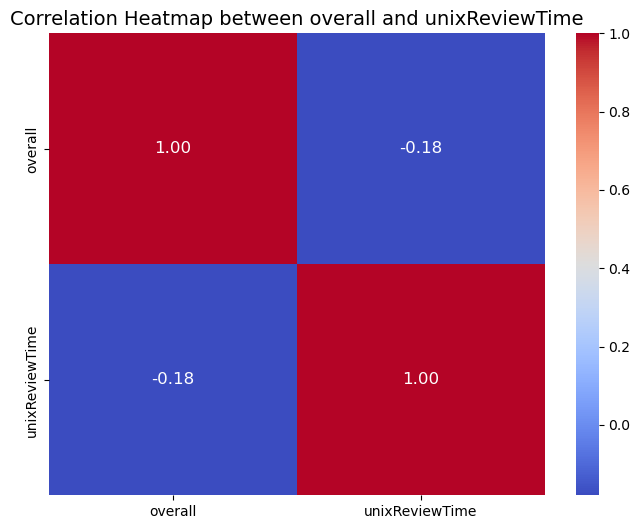

                 overall  unixReviewTime
overall         1.000000       -0.179696
unixReviewTime -0.179696        1.000000


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Select the columns of interest
columns_of_interest = ['overall', 'unixReviewTime']

# Calculate the correlation matrix
corr_matrix = df[columns_of_interest].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap between overall and unixReviewTime', fontsize=14)
plt.show()

print(corr_matrix)


In [83]:
#pd.set_option('display.max_colwidth', None)
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"09 1, 2016",A3CIUOJXQ5VDQ2,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice Blue'}",Shelly F,As advertised. Reasonably priced,Five Stars,1472688000,NaN,NaN
1,5.0,True,"11 14, 2013",A3H7T87S984REU,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice Blue'}",houserules18,Like the oder and the feel when I put it on my face. I have tried other brands but the reviews from people I know they prefer the oder of this brand. Not hard on the face when dry. Does not leave dry skin.,Good for the face,1384387200,NaN,NaN
2,1.0,True,"08 18, 2013",A3J034YH7UG4KT,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice Blue'}",Adam,I bought this to smell nice after I shave. When I put it on I smelled awful. I am 19 and I smelled like a grandmother with too much perfume.,Smells awful,1376784000,NaN,NaN
3,5.0,False,"05 3, 2011",A2UEO5XR3598GI,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice Blue'}",Rich K,"HEY!! I am an Aqua Velva Man and absolutely love this stuff, been using it for over 50 years. This is a true after shave lotion classic. Not quite sure how many women that have been attracted to me because of Aqua Velva, I do know for sure that it's just to many to count. Ha. Not sure how long this has been around but the Williams Company ran a paper advertisement, taken from a 1949 magazine, which features Ralph Bellamy of Detective Story and Ezio Pinza of South Pacific for Aqua Velva After Shave Lotion. I'm sure you all remember Ralph Bellamy and Ezio Pinza from the 40's right.\n\nThere slogan was "" There is nothing like an AQUA VELVA MAN "" and it seemed to work because this was a hot item when I was a young man. It's just amazing that this is still around when the vast majority of after shave lotions from that time period have disappeared over the years.\n\nThe only negative about Aqua Velva is it does not last very long. Usually in less than an hour the aroma has dissipated. The more expensive after shave lotions and perfumes have Ambergris in them which is quite expensive and comes from a sperm whale this enables the aroma to linger much longer.\n\nAt any rate this is a great classic after shave with a wonderful refreshing odor, give it a try you might just like it.\n\nNote :::; Some reviewers mention this 7oz size now comes in a plastic container, I just bought one in Wal-Mart and it was glass.",Truth is There IS Nothing Like an AQUA VELVA MAN.,1304380800,25,NaN
4,5.0,True,"05 6, 2011",A3SFRT223XXWF7,B00006L9LC,{'Size:': ' 200ml/6.7oz'},C. C. Christian,"If you ever want to feel pampered by a shampoo this one is the one. It smells like a wonderful perfume and cleans your hair until it shines plus adding a fullness that most other shampoo's don't give you. It is expensive, but worth it!",Bvlgari Shampoo,1304640000,3,NaN


In [84]:
# Display basic information about the dataset
print("Basic information about the dataset:")
print(df.info())

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5269 entries, 0 to 5268
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         5269 non-null   float64
 1   verified        5269 non-null   bool   
 2   reviewTime      5269 non-null   object 
 3   reviewerID      5269 non-null   object 
 4   asin            5269 non-null   object 
 5   style           4624 non-null   object 
 6   reviewerName    5269 non-null   object 
 7   reviewText      5264 non-null   object 
 8   summary         5264 non-null   object 
 9   unixReviewTime  5269 non-null   int64  
 10  vote            552 non-null    object 
 11  image           98 non-null     object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 458.1+ KB
None


In [85]:
# Count unique values in the "asin" column
unique_asin_count = df['asin'].nunique()
print("Number of unique ASINs:", unique_asin_count)

Number of unique ASINs: 85


In [86]:
# Count non-null values in the "reviewText" column
review_text_count = df['reviewText'].count()

print("Number of reviews with text:", review_text_count)


Number of reviews with text: 5264


In [87]:
# Count unique values in the "reviewerID" column
unique_user_count = df['reviewerID'].nunique()
print("Number of unique Reciewer:", unique_user_count)

Number of unique Reciewer: 991


ReviewText counts for each unique ASIN:
asin
B0000530HU      4
B00006L9LC    488
B00021DJ32      3
B0002JHI1I      2
B0006O10P4      6
             ... 
B019V2KYZS      6
B01BNEYGQU     13
B01DKQAXC0      1
B01DLR9IDI     21
B01E7UKR38     23
Name: reviewText, Length: 85, dtype: int64


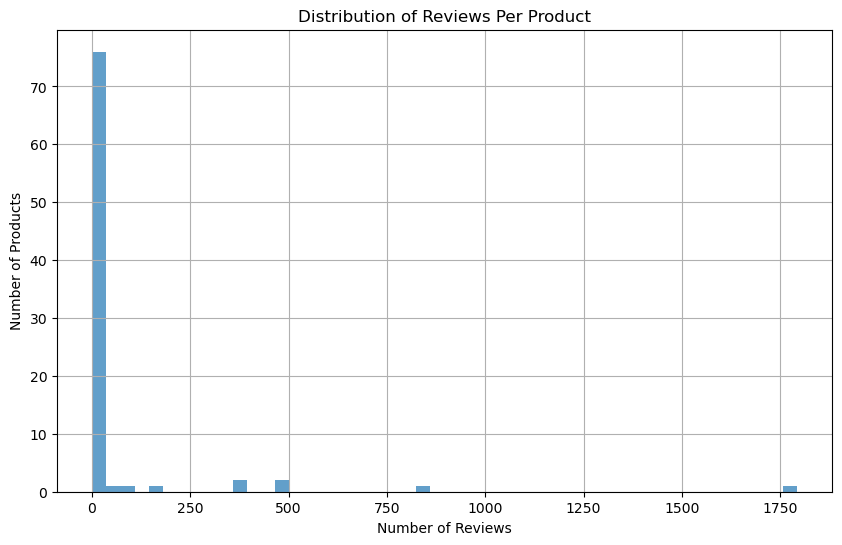

B0012Y0ZG2    1794
B000URXP6E     858
B001OHV1H4     489
B00006L9LC     489
B0009RF9DW     392
              ... 
B00B7V273E       1
B01DKQAXC0       1
B00MGK9Z8U       1
B0091OCA86       1
B00GHJOM2U       1
Name: asin, Length: 85, dtype: int64


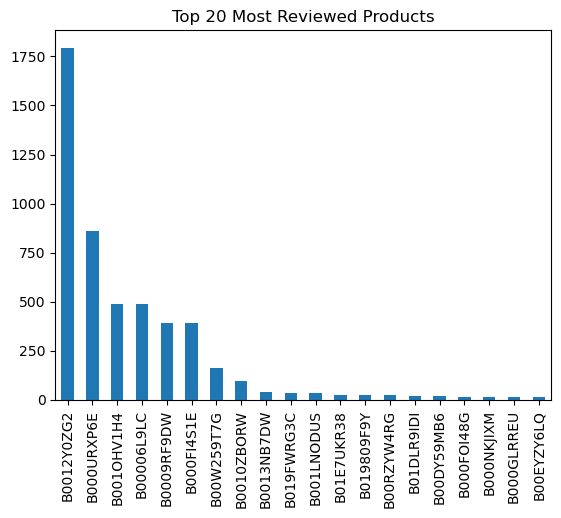

In [88]:
# Count reviewText for each unique ASIN
review_text_counts_per_asin = df.groupby('asin')['reviewText'].count()

print("ReviewText counts for each unique ASIN:")
print(review_text_counts_per_asin)

# Distribution of reviews per product 
plt.figure(figsize=(10, 6))
review_text_counts_per_asin.hist(bins=50, alpha=0.7)
plt.title('Distribution of Reviews Per Product')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Products')
plt.show()

#Most Reviewed Products
print(df['asin'].value_counts())
df['asin'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Most Reviewed Products")
plt.show()


Distribution of reviews per user:
reviewerID
AKJHHD5VEH7VG     12
A1UQBFCERIP7VJ    12
A3NFZN1GS1RKR9    11
AUX122XW8ONG6     11
A3RUBIOZYJNY0D    10
                  ..
A2G90R2ZU6KU5D     5
A2GBIFL43U1LKJ     5
A2GOEDQ35EBF1R     5
A24HQ2N7332W7W     4
A3DA9MP7OGLPC0     0
Name: reviewText, Length: 991, dtype: int64


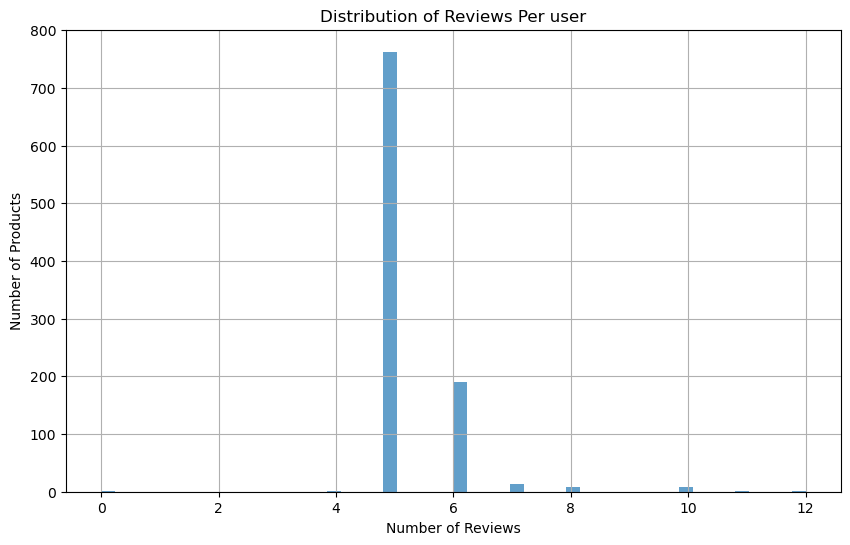

AKJHHD5VEH7VG     12
A1UQBFCERIP7VJ    12
AUX122XW8ONG6     11
A3NFZN1GS1RKR9    11
A11QGZ39A7ZF0X    10
                  ..
A3U05BH8UYBNLE     5
A21C5SBM0KCCH9     5
ARI1N006KSXX       5
A29PKN4LL05QGF     5
A24HQ2N7332W7W     4
Name: reviewerID, Length: 991, dtype: int64


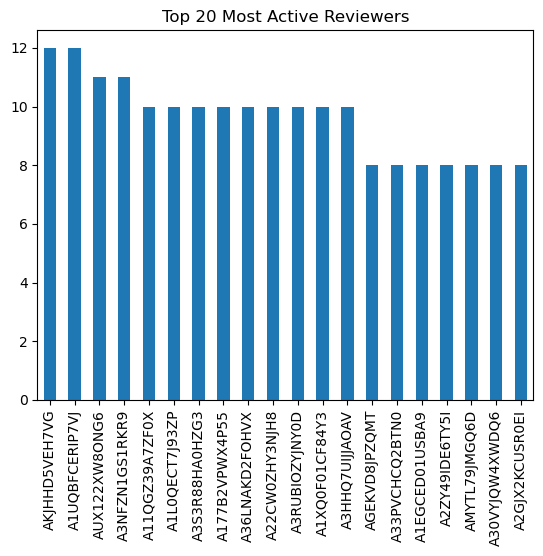

In [89]:


# Distribution of reviews per user
print("\nDistribution of reviews per user:")
user_reviews = df.groupby('reviewerID')['reviewText'].count().sort_values(ascending=False)
print(user_reviews)

# Distribution of reviews per user 
plt.figure(figsize=(10, 6))
user_reviews.hist(bins=50, alpha=0.7)
plt.title('Distribution of Reviews Per user')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Products')
plt.show()


#Top Active Reviewers
print(df['reviewerID'].value_counts())
df['reviewerID'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Most Active Reviewers")
plt.show()





Review lengths:
count    5269.000000
mean      202.006643
std       291.783089
min         2.000000
25%        44.000000
50%       115.000000
75%       232.000000
max      5214.000000
Name: reviewLength, dtype: float64


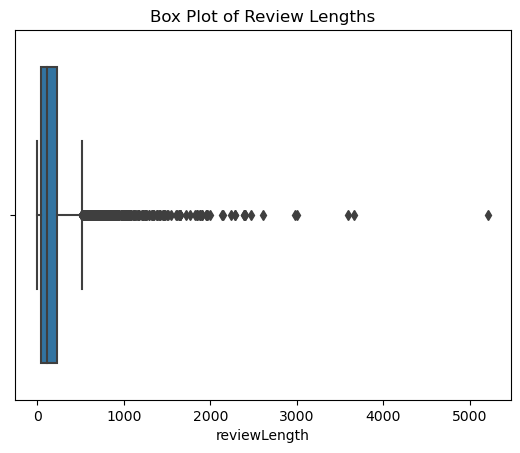

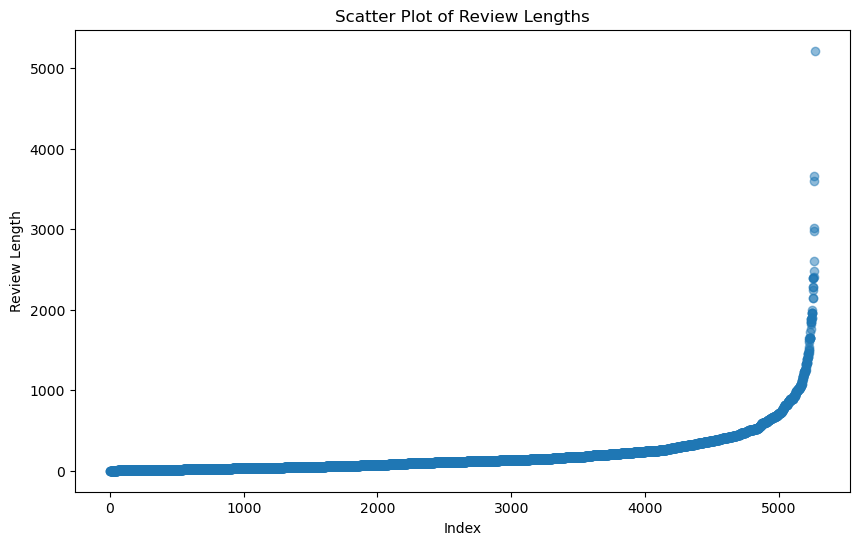

Average review length: 202.20 characters


In [90]:

# Review lengths 
df['reviewLength'] = df['reviewText'].apply(lambda x: len(str(x)))
print("\nReview lengths:")
print(df['reviewLength'].describe())


# Box plot for review lengths
sns.boxplot(x=df['reviewLength'])
plt.title('Box Plot of Review Lengths')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(range(df.shape[0]), df['reviewLength'].sort_values(), alpha=0.5)
plt.title('Scatter Plot of Review Lengths')
plt.xlabel('Index')
plt.ylabel('Review Length')
plt.show()

#average review length
average_review_length = df['reviewText'].str.len().mean()
print(f"Average review length: {average_review_length:.2f} characters")



In [91]:

# Analyze review lengths for potential outliers
print("\nReview length outliers (using the 1.5*IQR rule):")
Q1 = df['reviewLength'].quantile(0.25)
Q3 = df['reviewLength'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df['reviewLength'] < (Q1 - 1.5 * IQR)) | (df['reviewLength'] > (Q3 + 1.5 * IQR))
outliers = df[outlier_condition]
print(outliers['reviewLength'])



Review length outliers (using the 1.5*IQR rule):
3       1417
120      692
132      668
181     1227
182      640
        ... 
5179    2142
5180     621
5181     716
5191     594
5228     668
Name: reviewLength, Length: 450, dtype: int64


In [92]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image', 'reviewLength'],
      dtype='object')

True     4280
False     989
Name: verified, dtype: int64


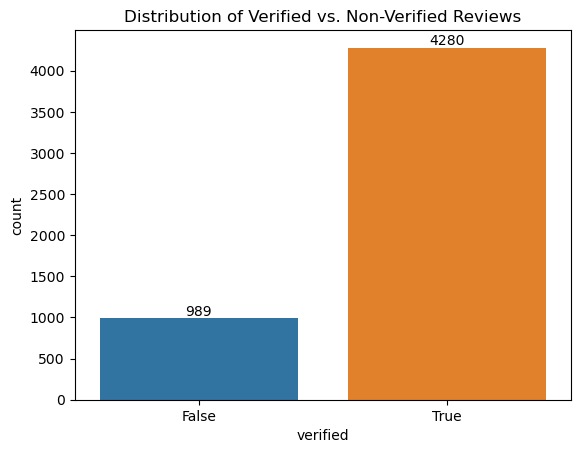

In [93]:
#verified reviews count distribution
print(df['verified'].value_counts())
ax = sns.countplot(data=df, x='verified')
plt.title("Distribution of Verified vs. Non-Verified Reviews")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


In [94]:
# Apply conversion to all object columns, assuming they might contain lists or dictionaries
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].apply(lambda x: str(x) if isinstance(x, (list, dict)) else x)
    


In [95]:
# checking for duplicates
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")



Number of duplicate rows: 1027


In [96]:
# Drop duplicates 
df = df.drop_duplicates()
df.count()

overall           4242
verified          4242
reviewTime        4242
reviewerID        4242
asin              4242
style             3610
reviewerName      4242
reviewText        4238
summary           4238
unixReviewTime    4242
vote               438
image               78
reviewLength      4242
dtype: int64

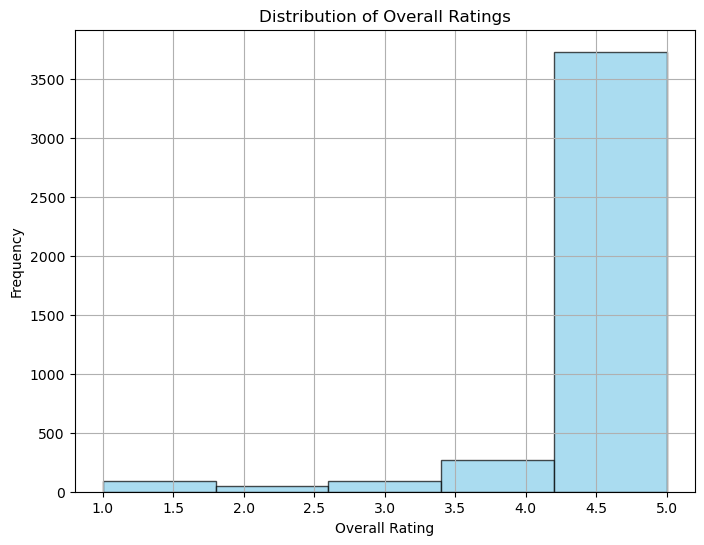

In [97]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
overall_ratings = df['overall']

# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
plt.hist(overall_ratings, bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Ratings')
plt.grid(True)
plt.show()


In [98]:
# Get the count of each unique value in the 'overall' column
overall_counts = df['overall'].value_counts()

# Print the counts
print(overall_counts)


5.0    3733
4.0     272
3.0      93
1.0      92
2.0      52
Name: overall, dtype: int64


# Text basic pre-processing

In [99]:

#removing all the non-verified reviews
df = df[df['verified'] == True]
df.count()

overall           3442
verified          3442
reviewTime        3442
reviewerID        3442
asin              3442
style             2930
reviewerName      3442
reviewText        3438
summary           3438
unixReviewTime    3442
vote               371
image               64
reviewLength      3442
dtype: int64

In [100]:
# verified','reviewerID', 'asin', 'reviewerName','reviewTime', 'style', 'unixReviewTime', 'vote', 'image are not related with overall, so we can drop them

#dropping unwanted columns
df = df.drop(columns=['verified','reviewerID', 'asin', 'reviewerName','reviewTime', 'style', 'unixReviewTime', 'vote', 'image'])
df

,overall,reviewText,summary,reviewLength
0,5.0,As advertised. Reasonably priced,Five Stars,32
1,5.0,Like the oder and the feel when I put it on my face. I have tried other brands but the reviews from people I know they prefer the oder of this brand. Not hard on the face when dry. Does not leave dry skin.,Good for the face,207
2,1.0,I bought this to smell nice after I shave. When I put it on I smelled awful. I am 19 and I smelled like a grandmother with too much perfume.,Smells awful,142
4,5.0,"If you ever want to feel pampered by a shampoo this one is the one. It smells like a wonderful perfume and cleans your hair until it shines plus adding a fullness that most other shampoo's don't give you. It is expensive, but worth it!",Bvlgari Shampoo,237
7,2.0,No change my scalp still itches like crazy. It doesnt lather at all so its very hard to move around the hair and scalp. It does smell good and my hair feels clean.,No change my scalp still itches like crazy. It doesnt lather at all so its ...,163
...,...,...,...,...
5264,5.0,"I have genetic undereye darkness. Ive accepted that a long time ago. However, this product helps keep my bags under control. My husband uses it also. Hes a huge fan. It goes on smoothly and causes no irritation to my eyes. Therefore, I give this product an A+.",Pretty Sweet!!!,260
5265,5.0,I absolutely love this eye gel.,As advertised,31
5266,5.0,"The eye gel is easy to apply and I use it morning and night. It is cool to the touch, and the dispenser is ingenious.",I'm very happy with,117
5267,5.0,Ok this eye gel is good stuff.,Does it's thing!,30


In [101]:
#Labelling data from Overall Ratings
def label_rating(rating):
    if rating in [4, 5]:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif rating in [1, 2]:
        return "Negative"
    else:
        return "Unknown"


df['label'] = df['overall'].apply(label_rating)

df['reviewText'] = df['reviewText'].astype(str)
df['review_len'] = df['reviewText'].apply(len)

# combining reviewText and summary column
df['text'] = df['reviewText'] + ' ' + df['summary']
df

,overall,reviewText,summary,reviewLength,label,review_len,text
0,5.0,As advertised. Reasonably priced,Five Stars,32,Positive,32,As advertised. Reasonably priced Five Stars
1,5.0,Like the oder and the feel when I put it on my face. I have tried other brands but the reviews from people I know they prefer the oder of this brand. Not hard on the face when dry. Does not leave dry skin.,Good for the face,207,Positive,207,Like the oder and the feel when I put it on my face. I have tried other brands but the reviews from people I know they prefer the oder of this brand. Not hard on the face when dry. Does not leave dry skin. Good for the face
2,1.0,I bought this to smell nice after I shave. When I put it on I smelled awful. I am 19 and I smelled like a grandmother with too much perfume.,Smells awful,142,Negative,142,I bought this to smell nice after I shave. When I put it on I smelled awful. I am 19 and I smelled like a grandmother with too much perfume. Smells awful
4,5.0,"If you ever want to feel pampered by a shampoo this one is the one. It smells like a wonderful perfume and cleans your hair until it shines plus adding a fullness that most other shampoo's don't give you. It is expensive, but worth it!",Bvlgari Shampoo,237,Positive,237,"If you ever want to feel pampered by a shampoo this one is the one. It smells like a wonderful perfume and cleans your hair until it shines plus adding a fullness that most other shampoo's don't give you. It is expensive, but worth it! Bvlgari Shampoo"
7,2.0,No change my scalp still itches like crazy. It doesnt lather at all so its very hard to move around the hair and scalp. It does smell good and my hair feels clean.,No change my scalp still itches like crazy. It doesnt lather at all so its ...,163,Negative,163,No change my scalp still itches like crazy. It doesnt lather at all so its very hard to move around the hair and scalp. It does smell good and my hair feels clean. No change my scalp still itches like crazy. It doesnt lather at all so its ...
...,...,...,...,...,...,...,...
5264,5.0,"I have genetic undereye darkness. Ive accepted that a long time ago. However, this product helps keep my bags under control. My husband uses it also. Hes a huge fan. It goes on smoothly and causes no irritation to my eyes. Therefore, I give this product an A+.",Pretty Sweet!!!,260,Positive,260,"I have genetic undereye darkness. Ive accepted that a long time ago. However, this product helps keep my bags under control. My husband uses it also. Hes a huge fan. It goes on smoothly and causes no irritation to my eyes. Therefore, I give this product an A+. Pretty Sweet!!!"
5265,5.0,I absolutely love this eye gel.,As advertised,31,Positive,31,I absolutely love this eye gel. As advertised
5266,5.0,"The eye gel is easy to apply and I use it morning and night. It is cool to the touch, and the dispenser is ingenious.",I'm very happy with,117,Positive,117,"The eye gel is easy to apply and I use it morning and night. It is cool to the touch, and the dispenser is ingenious. I'm very happy with"
5267,5.0,Ok this eye gel is good stuff.,Does it's thing!,30,Positive,30,Ok this eye gel is good stuff. Does it's thing!


In [102]:
# Drop columns
df = df.drop(columns=['reviewText', 'summary', 'review_len'])
df

,overall,reviewLength,label,text
0,5.0,32,Positive,As advertised. Reasonably priced Five Stars
1,5.0,207,Positive,Like the oder and the feel when I put it on my face. I have tried other brands but the reviews from people I know they prefer the oder of this brand. Not hard on the face when dry. Does not leave dry skin. Good for the face
2,1.0,142,Negative,I bought this to smell nice after I shave. When I put it on I smelled awful. I am 19 and I smelled like a grandmother with too much perfume. Smells awful
4,5.0,237,Positive,"If you ever want to feel pampered by a shampoo this one is the one. It smells like a wonderful perfume and cleans your hair until it shines plus adding a fullness that most other shampoo's don't give you. It is expensive, but worth it! Bvlgari Shampoo"
7,2.0,163,Negative,No change my scalp still itches like crazy. It doesnt lather at all so its very hard to move around the hair and scalp. It does smell good and my hair feels clean. No change my scalp still itches like crazy. It doesnt lather at all so its ...
...,...,...,...,...
5264,5.0,260,Positive,"I have genetic undereye darkness. Ive accepted that a long time ago. However, this product helps keep my bags under control. My husband uses it also. Hes a huge fan. It goes on smoothly and causes no irritation to my eyes. Therefore, I give this product an A+. Pretty Sweet!!!"
5265,5.0,31,Positive,I absolutely love this eye gel. As advertised
5266,5.0,117,Positive,"The eye gel is easy to apply and I use it morning and night. It is cool to the touch, and the dispenser is ingenious. I'm very happy with"
5267,5.0,30,Positive,Ok this eye gel is good stuff. Does it's thing!


In [103]:
# Sample of 1000 registers

sample_df = df.sample(n=1000, random_state=42)
sample_df

,overall,reviewLength,label,text
887,1.0,68,Negative,No seal on bottle. Extremely runny. Like water. Seams tampered with. Not sealed!
60,5.0,48,Positive,"Great ingredients, but didn't agree with my skin Five Stars"
1223,5.0,136,Positive,"I love this scent unconditional Love, soft and clean. Amazons value was great also for this set. Thanks again for another great product! Lovely scent"
616,5.0,28,Positive,Smells AMAZING. Worth buying Worth
2058,5.0,483,Positive,"This product was definitely a good deal for me. No surprises about the delivery estimated time and especially (and much more important) because the product that arrived here was exactly what I was expecting.\n\nThe seller did everything just like promised and I will have no hesitation in buying something with him again if I get interested by any of his products.\n\nBy the way, this bottle has an excelent size for saving money by buying in big quantities, so a definitely recomend it! Good product, no delivery surprises!"
...,...,...,...,...
4729,5.0,705,Positive,"After extensive dental work including a seven tooth upper implant, I found flossing impracticable. My dentist suggested using this unit twice a day, and after two months it works perfectly.\n\nIt was a little tricky learning to start it in my mouth and then letting the water drizzle out without splattering, but time and habit solved everything.\n\nJust had my three month checkup and everything was sparkling clean around both the implant and my remaining teeth.\n\nOne small amusement: the carrying case has holders for four tips but the unit comes with six. Luckily the fifth wheel, as it were, fits in the carrying case even though there is no slot for it.\n\nSwish and pik away!\n\nRobert C. Ross\nJanuary 2015 Works great"
1052,5.0,76,Positive,"gave the shower gel for a Christmas gift, she said she loved it, thanks rvv. she said she loved it, thanks rvv"
219,5.0,25,Positive,Good price. Good product Five Stars
4951,5.0,101,Positive,"I love these soaps, all fragrances. I have been using them for many years and will continue to do so. Pre de Provence Soap"


Positive    953
Negative     41
Neutral       6
Name: label, dtype: int64


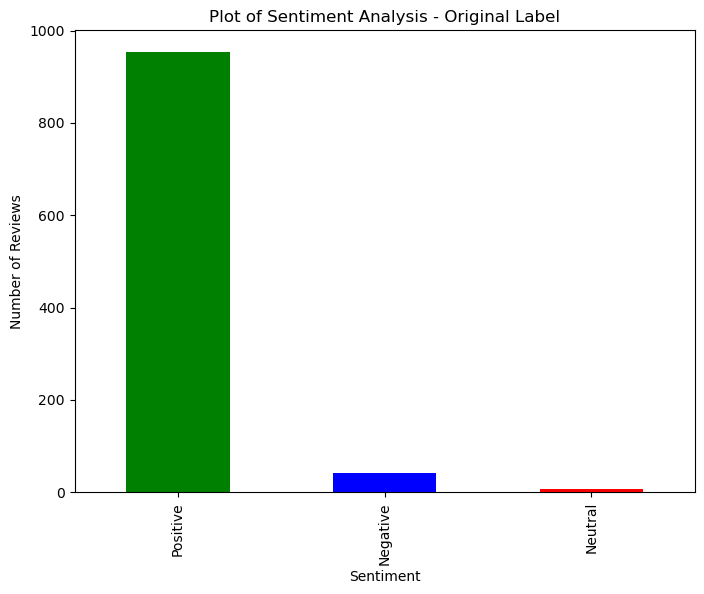

In [104]:

# Select the 'reviewText' and 'sentiment' columns
text_df = sample_df[['text', 'label', 'reviewLength']]
text_df

#Sentiments of the original Text

# Count the occurrences of each sentiment
sentiment_counts = text_df['label'].value_counts()
print(sentiment_counts)

# Bar Chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Plot of Sentiment Analysis - Original Label')
plt.show()


# Split the data into training and testing sets (70% training, 30% testing)
train_df, test_df = train_test_split(text_df, test_size=0.3, random_state=42)



train_df.count()

test_df.count()

# 3. Study the below three Lexicons packages
After to do research about VADER, TextBlob and SENTIWORDNET, we dediced to use VADER and TextBlob for our implementation

4. Pre-process your text
For model VADER, we don't need to do preprocessing because it supports a proper handling of sentences.
For model TextBlob, we need to do some proprocessing steps.

In [105]:
import re 
import string  
import contractions 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Pre-processing required to apply textBlob

def preprocess_text(text):
    try:
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
    except:
        pass
    
    try:
        # Remove special characters
        text = re.sub(r'[^\w\s]', '', text)
    except:
        pass

    # Remove digits
    text = re.sub(r'\d+', '', text)

    #lower case corpus
     #text = text.lower()

    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Removing trailing whitespaces
    text = ' '.join([token for token in text.split()])
    
    # Handle the contractions
    expanded_text = contractions.fix(text)

    # Tokenization
    tokens = word_tokenize(expanded_text)

    # Stop words removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Lemmatization
    #lemmatizer = WordNetLemmatizer()
    #lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join tokens back into text
    processed_text = ' '.join(filtered_tokens)
    
    return processed_text


In [106]:
# Applying pre-processing
text_df['text_preprocessed'] = text_df['text'].apply(preprocess_text)

text_df.head(20)

,text,label,reviewLength,text_preprocessed
887,No seal on bottle. Extremely runny. Like water. Seams tampered with. Not sealed!,Negative,68,seal bottle Extremely runny Like water Seams tampered sealed
60,"Great ingredients, but didn't agree with my skin Five Stars",Positive,48,Great ingredients agree skin Five Stars
1223,"I love this scent unconditional Love, soft and clean. Amazons value was great also for this set. Thanks again for another great product! Lovely scent",Positive,136,love scent unconditional Love soft clean Amazons value great also set Thanks another great product Lovely scent
616,Smells AMAZING. Worth buying Worth,Positive,28,Smells AMAZING Worth buying Worth
2058,"This product was definitely a good deal for me. No surprises about the delivery estimated time and especially (and much more important) because the product that arrived here was exactly what I was expecting.\n\nThe seller did everything just like promised and I will have no hesitation in buying something with him again if I get interested by any of his products.\n\nBy the way, this bottle has an excelent size for saving money by buying in big quantities, so a definitely recomend it! Good product, no delivery surprises!",Positive,483,product definitely good deal surprises delivery estimated time especially much important product arrived exactly expecting seller everything like promised hesitation buying something get interested products way bottle excelent size saving money buying big quantities definitely recomend Good product delivery surprises
4658,I have used this before and had missed it terribly. It is a fabulous product that I recommend for anyone with dry course hair. great product,Positive,126,used missed terribly fabulous product recommend anyone dry course hair great product
2271,"Smells great and performs great. Will buy it again, definitely Love this shower gel",Positive,62,Smells great performs great buy definitely Love shower gel
2052,"I have thick but fine hair, and I had a hugely horrible cut that left me with layers of split ends. My hairdresser recommended this product and it's absolutely terrific for my hair. It leaves it looking much better while it grows out. My hair looks a little courser (nice), and I get great volume. Split ends are managed better. Great smell too. I use it with the Matrix conditioner (and I usually don't like conditioners) and it leaves my hair so soft but it doesn't lose its shape. I was recently traveling and ran out, used a different product to wash my hair, and was miserable until I could get back to this product. Great Products.",Positive,627,thick fine hair hugely horrible cut left layers split ends hairdresser recommended product absolutely terrific hair leaves looking much better grows hair looks little courser nice get great volume Split ends managed better Great smell use Matrix conditioner usually like conditioners leaves hair soft lose shape recently traveling ran used different product wash hair miserable could get back product Great Products
4625,This treatment is awesome to reinforce your hair and make it look shinny and healthy. I def recommend it for everybody. Nice product,Positive,119,treatment awesome reinforce hair make look shinny healthy def recommend everybody Nice product
2371,Smells great!! Thanks for the fast delivery! Five Stars,Positive,44,Smells great Thanks fast delivery Five Stars


# 5. Modeling (Sentiment Analysis) Lexicon
TextBlob

In [107]:
# Function to get sentiment from polarity for TextBlob

def get_sentiment(polarity):
    if -0.2 <= polarity <= 0.2:
        return 'Neutral'
    elif polarity > 0.2:
        return 'Positive'
    else:
        return 'Negative'

In [108]:
text_df['label_textblob'] = text_df['text_preprocessed'].apply(lambda x: get_sentiment(TextBlob(x).sentiment.polarity))
text_df

,text,label,reviewLength,text_preprocessed,label_textblob
887,No seal on bottle. Extremely runny. Like water. Seams tampered with. Not sealed!,Negative,68,seal bottle Extremely runny Like water Seams tampered sealed,Neutral
60,"Great ingredients, but didn't agree with my skin Five Stars",Positive,48,Great ingredients agree skin Five Stars,Positive
1223,"I love this scent unconditional Love, soft and clean. Amazons value was great also for this set. Thanks again for another great product! Lovely scent",Positive,136,love scent unconditional Love soft clean Amazons value great also set Thanks another great product Lovely scent,Positive
616,Smells AMAZING. Worth buying Worth,Positive,28,Smells AMAZING Worth buying Worth,Positive
2058,"This product was definitely a good deal for me. No surprises about the delivery estimated time and especially (and much more important) because the product that arrived here was exactly what I was expecting.\n\nThe seller did everything just like promised and I will have no hesitation in buying something with him again if I get interested by any of his products.\n\nBy the way, this bottle has an excelent size for saving money by buying in big quantities, so a definitely recomend it! Good product, no delivery surprises!",Positive,483,product definitely good deal surprises delivery estimated time especially much important product arrived exactly expecting seller everything like promised hesitation buying something get interested products way bottle excelent size saving money buying big quantities definitely recomend Good product delivery surprises,Positive
...,...,...,...,...,...
4729,"After extensive dental work including a seven tooth upper implant, I found flossing impracticable. My dentist suggested using this unit twice a day, and after two months it works perfectly.\n\nIt was a little tricky learning to start it in my mouth and then letting the water drizzle out without splattering, but time and habit solved everything.\n\nJust had my three month checkup and everything was sparkling clean around both the implant and my remaining teeth.\n\nOne small amusement: the carrying case has holders for four tips but the unit comes with six. Luckily the fifth wheel, as it were, fits in the carrying case even though there is no slot for it.\n\nSwish and pik away!\n\nRobert C. Ross\nJanuary 2015 Works great",Positive,705,extensive dental work including seven tooth upper implant found flossing impracticable dentist suggested using unit twice day two months works perfectly little tricky learning start mouth letting water drizzle without splattering time habit solved everything three month checkup everything sparkling clean around implant remaining teeth One small amusement carrying case holders four tips unit comes six Luckily fifth wheel fits carrying case even though slot Swish pik away Robert C Ross January Works great,Neutral
1052,"gave the shower gel for a Christmas gift, she said she loved it, thanks rvv. she said she loved it, thanks rvv",Positive,76,gave shower gel Christmas gift said loved thanks rvv said loved thanks rvv,Positive
219,Good price. Good product Five Stars,Positive,25,Good price Good product Five Stars,Positive
4951,"I love these soaps, all fragrances. I have been using them for many years and will continue to do so. Pre de Provence Soap",Positive,101,love soaps fragrances using many years continue Pre de Provence Soap,Positive


Positive    756
Neutral     229
Negative     15
Name: label_textblob, dtype: int64


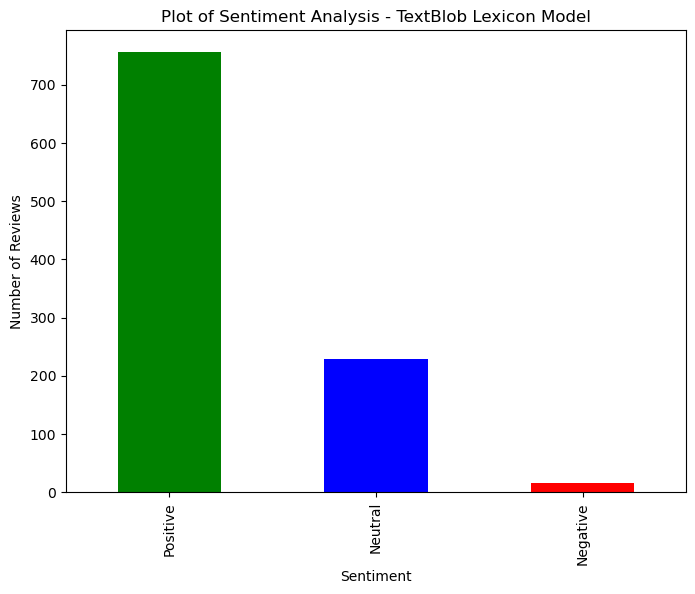

In [109]:
#Sentiments from TextBlob

sentiment_counts = text_df['label_textblob'].value_counts()
print(sentiment_counts)

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Plot of Sentiment Analysis - TextBlob Lexicon Model')
plt.show()

# Valence Aware Dictionary and Sentiment Reasoner (VADER)

In [110]:
# Function to get sentiment from polarity for Vader

def get_sentiment_byVader(compound):
    if -0.2 <= compound <= 0.2:
        return 'Neutral'
    elif compound > 0.2:
        return 'Positive'
    else:
        return 'Negative'

In [111]:
text_df['label_vader'] = text_df['text'].apply(lambda x: get_sentiment_byVader(SentimentIntensityAnalyzer().polarity_scores(x)["compound"]))
text_df

,text,label,reviewLength,text_preprocessed,label_textblob,label_vader
887,No seal on bottle. Extremely runny. Like water. Seams tampered with. Not sealed!,Negative,68,seal bottle Extremely runny Like water Seams tampered sealed,Neutral,Positive
60,"Great ingredients, but didn't agree with my skin Five Stars",Positive,48,Great ingredients agree skin Five Stars,Positive,Neutral
1223,"I love this scent unconditional Love, soft and clean. Amazons value was great also for this set. Thanks again for another great product! Lovely scent",Positive,136,love scent unconditional Love soft clean Amazons value great also set Thanks another great product Lovely scent,Positive,Positive
616,Smells AMAZING. Worth buying Worth,Positive,28,Smells AMAZING Worth buying Worth,Positive,Positive
2058,"This product was definitely a good deal for me. No surprises about the delivery estimated time and especially (and much more important) because the product that arrived here was exactly what I was expecting.\n\nThe seller did everything just like promised and I will have no hesitation in buying something with him again if I get interested by any of his products.\n\nBy the way, this bottle has an excelent size for saving money by buying in big quantities, so a definitely recomend it! Good product, no delivery surprises!",Positive,483,product definitely good deal surprises delivery estimated time especially much important product arrived exactly expecting seller everything like promised hesitation buying something get interested products way bottle excelent size saving money buying big quantities definitely recomend Good product delivery surprises,Positive,Positive
...,...,...,...,...,...,...
4729,"After extensive dental work including a seven tooth upper implant, I found flossing impracticable. My dentist suggested using this unit twice a day, and after two months it works perfectly.\n\nIt was a little tricky learning to start it in my mouth and then letting the water drizzle out without splattering, but time and habit solved everything.\n\nJust had my three month checkup and everything was sparkling clean around both the implant and my remaining teeth.\n\nOne small amusement: the carrying case has holders for four tips but the unit comes with six. Luckily the fifth wheel, as it were, fits in the carrying case even though there is no slot for it.\n\nSwish and pik away!\n\nRobert C. Ross\nJanuary 2015 Works great",Positive,705,extensive dental work including seven tooth upper implant found flossing impracticable dentist suggested using unit twice day two months works perfectly little tricky learning start mouth letting water drizzle without splattering time habit solved everything three month checkup everything sparkling clean around implant remaining teeth One small amusement carrying case holders four tips unit comes six Luckily fifth wheel fits carrying case even though slot Swish pik away Robert C Ross January Works great,Neutral,Positive
1052,"gave the shower gel for a Christmas gift, she said she loved it, thanks rvv. she said she loved it, thanks rvv",Positive,76,gave shower gel Christmas gift said loved thanks rvv said loved thanks rvv,Positive,Positive
219,Good price. Good product Five Stars,Positive,25,Good price Good product Five Stars,Positive,Positive
4951,"I love these soaps, all fragrances. I have been using them for many years and will continue to do so. Pre de Provence Soap",Positive,101,love soaps fragrances using many years continue Pre de Provence Soap,Positive,Positive


Positive    906
Neutral      67
Negative     27
Name: label_vader, dtype: int64


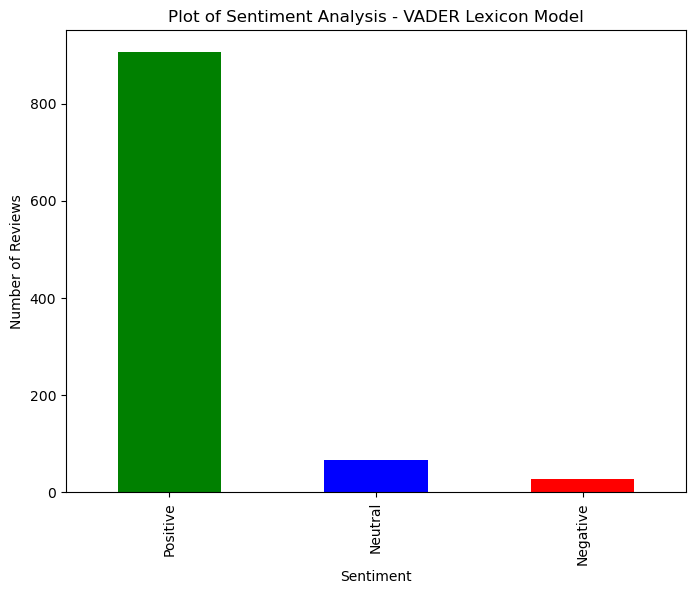

In [112]:
#Sentiments from VADER

sentiment_counts = text_df['label_vader'].value_counts()
print(sentiment_counts)

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Plot of Sentiment Analysis - VADER Lexicon Model')
plt.show()

# 6. Validate the results of both models and provide a comparision table.

In [113]:
# Accuracy

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

acc_score_vader = accuracy_score(text_df['label'],text_df['label_vader'])
print(acc_score_vader)

acc_score_textblob = accuracy_score(text_df['label'],text_df['label_textblob'])
print(acc_score_textblob)

0.913
0.759


# Analysis of VADER

In [114]:
acc_score_vader = accuracy_score(text_df['label'],text_df['label_vader'])
print("Accuracy for VADER is:", acc_score_vader)
print("Confusion Matrix for VADER:")
print(confusion_matrix(text_df['label'],text_df['label_vader']))

Accuracy for VADER is: 0.913
Confusion Matrix for VADER:
[[ 22   7  12]
 [  1   1   4]
 [  4  59 890]]


In [115]:
print("Classification Report for VADER:")
print(classification_report(text_df['label'],text_df['label_vader']))

Classification Report for VADER:
              precision    recall  f1-score   support

    Negative       0.81      0.54      0.65        41
     Neutral       0.01      0.17      0.03         6
    Positive       0.98      0.93      0.96       953

    accuracy                           0.91      1000
   macro avg       0.60      0.55      0.54      1000
weighted avg       0.97      0.91      0.94      1000



# Analysis of TextBlob

In [116]:
acc_score_textblob = accuracy_score(text_df['label'],text_df['label_textblob'])
print("Accuracy for TextBlob is:", acc_score_textblob)
print("Confusion Matrix for TextBlob:")
print(confusion_matrix(text_df['label'],text_df['label_textblob']))

Accuracy for TextBlob is: 0.759
Confusion Matrix for TextBlob:
[[  7  28   6]
 [  0   4   2]
 [  8 197 748]]


In [117]:
print("Classification Report for TextBlob:")
print(classification_report(text_df['label'],text_df['label_textblob']))

Classification Report for TextBlob:
              precision    recall  f1-score   support

    Negative       0.47      0.17      0.25        41
     Neutral       0.02      0.67      0.03         6
    Positive       0.99      0.78      0.88       953

    accuracy                           0.76      1000
   macro avg       0.49      0.54      0.39      1000
weighted avg       0.96      0.76      0.84      1000



# Phase # 2

In [204]:
import pandas as pd
import numpy as np
import gzip
import nltk
import json
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

from keras.optimizers import Adam
from keras.layers import Dense, Dropout
import tensorflow as tf
from keras.utils import to_categorical

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chitr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [205]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import contractions
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

# Imbalance datasets
from imblearn.over_sampling  import RandomOverSampler

In [206]:
# Set the seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [207]:
# Load the dataset
def load_data(file_name):
    with gzip.open(file_name, 'r') as f:
        data = [json.loads(line) for line in f]
    return pd.DataFrame(data)

In [208]:
# Load the "All Beauty" dataset
df = load_data("C:/Users/chitr/OneDrive - Centennial College/Attachment Winter 2024/COMP 262/Project/All_Beauty_5.json.gz")

# Convert potentially unhashable columns to a string representation
df = df.applymap(lambda x: str(x) if isinstance(x, (list, dict)) else x)

In [209]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

In [210]:
df.count()

# Get the row number
row_number = df.index

print(row_number)

RangeIndex(start=0, stop=5269, step=1)


In [211]:
# Sample of 2000 registers

sample_df = df.sample(n=2000, random_state=42)
sample_df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
4974,5.0,True,"07 19, 2013",A3NFZN1GS1RKR9,B00W259T7G,"{'Size:': ' 250 Gram', 'Color:': ' Green Tea'}",Mintea,"Long lasting, high quality soap, wide spectrum of scents... Leaves skin incredibly soft and fragrant. Pricey, but worth every penny",Excellent Product,1374192000,NaN,NaN
8,1.0,True,"05 6, 2018",A7ID5H7FWLJHC,B00006L9LC,{'Size:': ' Small'},U. V.,Too expensive for such poor quality. There was no improvement and I am starting to think my scalp is worse off than it was before I started using this product. I do agree with other reviews that it feels watered down too much. Had to use more shampoo than all other shampoo's I have tried to get a good lather.,Too expensive for such poor quality. There was no improvement and I am ...,1525564800,NaN,NaN
3007,5.0,True,"08 23, 2013",A2G7EEQJKKOU8R,B0012Y0ZG2,{'Size:': ' 45'},Linda Whiten,"I have loved this for years, bath and body discontinued it, never thought of looking for it online. So glad I did",Ile De Tahiti Moana Coconut Vanille,1377216000,NaN,NaN
626,5.0,True,"09 19, 2015",A28XHFOYRSV7VA,B0009RF9DW,{'Size:': ' 228'},Amazon Customer,Smells great..love the caddy.,Lovely,1442620800,NaN,NaN
4032,5.0,True,"05 27, 2013",A32MXI9376X72P,B0012Y0ZG2,{'Size:': ' 33.8 oz'},furga,"Not found often elsewhere, such as Sephora and other similar stores.\nIt's not cheap but it lasts for a long long time.",Huge! Really,1369612800,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2478,5.0,True,"07 26, 2016",A3Q6RS3X7VRVW3,B0012Y0ZG2,{'Size:': ' 255'},Nick Nasc,Been a fave for decades,Five Stars,1469491200,NaN,NaN
5199,5.0,True,"03 6, 2018",A28G6HAG3I755Y,B00JF2GVWK,NaN,R. Taylor,Great smell and products.,Five Stars,1520294400,NaN,NaN
4962,5.0,True,"07 3, 2014",A2UEIN7SIPZFRP,B00W259T7G,"{'Size:': ' 250 Gram', 'Color:': ' Linden'}",collies and cats,I love the linden scent; it's so refreshing. All of the Pre de Provence soaps I've tried are such a treat.,Linden scent is heavenly,1404345600,2,NaN
865,5.0,True,"08 15, 2012",A3ESPH5CN0GMIJ,B0009RF9DW,{'Size:': ' 163'},Adam Howard,"This soap has a very pleasant smell, but most importantly it is very concentrated and so you don't need to use as much soap (saving you money and resources). I used this for medical reasons (jock itch) and found that the tea tree solution helps. However Tea Tree is often very costly and to be able to buy this in bulk at such a good value... I would strongly recommend.",Outstanding value,1344988800,NaN,NaN


In [212]:
# Keep the verified reviews

#removing all the non-verified reviews
# sample_df = sample_df[sample_df['verified'] == True]

# sample_df



In [213]:
# combining 'reviewText' and 'summary' column into a new column 'text'
sample_df['text'] = sample_df['reviewText'].astype(str) + ' ' + sample_df['summary'].astype(str)

#dropping unwanted columns
sample_df = sample_df.drop(columns=['verified','reviewerID', 'asin', 'reviewerName','reviewTime', 'style', 'unixReviewTime', 'vote', 'image', 'reviewText', 'summary'])


sample_df_size_before = sample_df.shape[0]

sample_df

,overall,text
4974,5.0,"Long lasting, high quality soap, wide spectrum of scents... Leaves skin incredibly soft and fragrant. Pricey, but worth every penny Excellent Product"
8,1.0,Too expensive for such poor quality. There was no improvement and I am starting to think my scalp is worse off than it was before I started using this product. I do agree with other reviews that it feels watered down too much. Had to use more shampoo than all other shampoo's I have tried to get a good lather. Too expensive for such poor quality. There was no improvement and I am ...
3007,5.0,"I have loved this for years, bath and body discontinued it, never thought of looking for it online. So glad I did Ile De Tahiti Moana Coconut Vanille"
626,5.0,Smells great..love the caddy. Lovely
4032,5.0,"Not found often elsewhere, such as Sephora and other similar stores.\nIt's not cheap but it lasts for a long long time. Huge! Really"
...,...,...
2478,5.0,Been a fave for decades Five Stars
5199,5.0,Great smell and products. Five Stars
4962,5.0,I love the linden scent; it's so refreshing. All of the Pre de Provence soaps I've tried are such a treat. Linden scent is heavenly
865,5.0,"This soap has a very pleasant smell, but most importantly it is very concentrated and so you don't need to use as much soap (saving you money and resources). I used this for medical reasons (jock itch) and found that the tea tree solution helps. However Tea Tree is often very costly and to be able to buy this in bulk at such a good value... I would strongly recommend. Outstanding value"


In [214]:
# Drop duplicates
sample_df = sample_df.drop_duplicates()
sample_df_size_after = sample_df.shape[0]

sample_df.shape

(1007, 2)

In [215]:
print('Number of duplicated rows:', sample_df_size_before - sample_df_size_after)
sample_df.count()
print("Shape of dataset:", sample_df.shape)

Number of duplicated rows: 993
Shape of dataset: (1007, 2)


In [216]:
#Labelling data from Overall Ratings
def label_rating(rating):
    if rating in [4, 5]:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif rating in [1, 2]:
        return "Negative"
    else:
        return "Unknown"


sample_df['label'] = sample_df['overall'].apply(label_rating)
sample_df

C:\Users\chitr\AppData\Local\Temp\ipykernel_13168\358587213.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['label'] = sample_df['overall'].apply(label_rating)


,overall,text,label
4974,5.0,"Long lasting, high quality soap, wide spectrum of scents... Leaves skin incredibly soft and fragrant. Pricey, but worth every penny Excellent Product",Positive
8,1.0,Too expensive for such poor quality. There was no improvement and I am starting to think my scalp is worse off than it was before I started using this product. I do agree with other reviews that it feels watered down too much. Had to use more shampoo than all other shampoo's I have tried to get a good lather. Too expensive for such poor quality. There was no improvement and I am ...,Negative
3007,5.0,"I have loved this for years, bath and body discontinued it, never thought of looking for it online. So glad I did Ile De Tahiti Moana Coconut Vanille",Positive
626,5.0,Smells great..love the caddy. Lovely,Positive
4032,5.0,"Not found often elsewhere, such as Sephora and other similar stores.\nIt's not cheap but it lasts for a long long time. Huge! Really",Positive
...,...,...,...
2743,5.0,"Best sulfate-free shampoo and conditioner ever! And...I've tried many. A little goes a long way, so don't hesitate to buy this wonderful product. . Best sulfate-free shampoo and conditioner ever",Positive
1873,5.0,My hair feels really clean after using this shampoo & conditioner. I have hard water at home and I was using Neutrogena to remove the build-up and though it works well it also dried my hair out too much. This product does the same thing but leaves my hair feeling very clean & soft easy to manage. Very good product & would purchase again. Makes your hair feel CLEAN!,Positive
272,5.0,Been using this brand for years. My scalp and hair love it whether I'm living in Calofornia or Hawaii. Good quality hair products! Great product!,Positive
508,5.0,Great product for relaxing! Five Stars,Positive


In [217]:
# Sample of 200 registers for validation
random_state = 42
text_df, sample_df = train_test_split(sample_df, test_size=200,stratify=sample_df['label'], random_state=random_state)

print("Shape of dataset:", text_df.shape)
print("Shape of dataset:", sample_df.shape)

Shape of dataset: (807, 3)
Shape of dataset: (200, 3)


In [218]:
# Pre-processing required to apply in ML models

def preprocessing_text_for_ml(text):
    try:
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
    except:
        pass

    try:
        # Remove special characters
        text = re.sub(r'[^\w\s]', '', text)
    except:
        pass

    # Remove digits
    text = re.sub(r'\d+', '', text)

    #lower case corpus
    text = text.lower()

    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Removing trailing whitespaces
    text = ' '.join([token for token in text.split()])

    # Handle the contractions
    expanded_text = contractions.fix(text)

    # Tokenization
    tokens = word_tokenize(expanded_text)

    # Stop words removal
    stop_words = set(stopwords.words('english'))
    custom_stopwords = stop_words - {'not', 'no', 'nor', 'but', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}
    filtered_tokens = [word for word in tokens if word.lower() not in custom_stopwords]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join tokens back into text
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text


In [220]:
# Applying pre-processing for dataframe for ML

text_df['text_preprocessed'] = text_df['text'].apply(preprocessing_text_for_ml)
text_df.head(20)

,overall,text,label,text_preprocessed
576,5.0,It was just what I wanted. Five Stars,Positive,wanted five star
1344,5.0,Unexpectedly good. The best smelling shower gel I have ever used. A little bit on the sweet side. But not chemical Wow,Positive,unexpectedly good best smelling shower gel ever used little bit sweet side but not chemical wow
1197,5.0,"Would definitely buy it again/ Always get lots of compliments whenever I wear it. Now, I just need to find more cologne before it runs out. Love it!",Positive,would definitely buy always get lot compliment whenever wear need find cologne run love
3980,5.0,I have been wearing for years while I am on stage (and off stage). I wish it were still in stores. Thank you! Love it - thank you,Positive,wearing year stage stage wish still store thank love thank
2992,5.0,"wonderful stuff ,,great shower cream , better than any other i have tried for mild oily skin .the large is the best value and last a lot longer than i thought awesome product worth the money",Positive,wonderful stuff great shower cream better tried mild oily skin large best value last lot longer thought awesome product worth money
5054,4.0,"Colgate is my favorite brand of toothpaste. I and my family always use Optic White. This review is for Maximum Cavity Protection for growing adult teeth, which is a new concept. The toothpaste comes in a stand up container that has a press style pump. You press the pump to express toothpaste, which is a sparkly green colored gel.\n\nThe flavor is mild bubble fruit and that is exactly the way the toothpaste tastes, with just a hint of mint added. The toothpaste offers maximum cavity protection with anticavity 0.24% fluoride. It promises to fortify weak spots on enamel and helps to reduce plaque buildup with regular brushing. It also freshens breathe. It does not have whitening properties, which is the only reason I deducted a star. My college age daughter brushes with whitening toothpaste, so she will brush with this toothpaste first, for cavity protection, to reduce plaque buildup, and to fortify weak spots on enamel, then finish with a whitening toothpaste (like Colgate Optic White) or mouthwash, for whitening benefits.\n\nThe toothpaste tastes good and offers some serious benefits for growing adult teeth. Perfect for my 19 year old daughter! Offers Many Benefits For Growing Adult Teeth",Positive,colgate favorite brand toothpaste family always use optic white review maximum cavity protection growing adult teeth new concept toothpaste come stand container press style pump press pump express toothpaste sparkly green colored gel flavor mild bubble fruit exactly way toothpaste taste hint mint added toothpaste offer maximum cavity protection anticavity fluoride promise fortify weak spot enamel help reduce plaque buildup regular brushing also freshens breathe not whitening property reason deducted star college age daughter brush whitening toothpaste brush toothpaste first cavity protection reduce plaque buildup fortify weak spot enamel finish whitening toothpaste like colgate optic white mouthwash whitening benefit toothpaste taste good offer serious benefit growing adult teeth perfect year old daughter offer many benefit growing adult teeth
5061,5.0,I love this product. I have dark circles under my eyes. I've tried EVERYTHING! I keep it in the fridge and it nice and cool when input it on my clean skin. Nice,Positive,love product dark circle eye tried everything keep fridge nice cool input clean skin nice
4907,5.0,"I LOVE LOVE LOVE this soap!!! These are thick heavy bars that are beautiful, smell wonderful, and create a nice soft lather. They look and feel luxurious and they're large, so they'll last a long time. I am so impressed. Every one of them (I have several types) is wonderful. The coconut feels especially soft and soothing. The raspberry is a gorgeous color. They leave a faint scent in my bathroom which makes it smell delicious. There is nothing negative to say. I've very pleased. Thes

In [221]:
# Get the new X, y Values

text_df_X = text_df['text_preprocessed']
text_df_y = text_df['label']

print("Shape of DF data (X) (y):", text_df_X.shape, text_df_y.shape)

Shape of DF data (X) (y): (807,) (807,)


In [222]:
# 10.a. Split the data into 70% for training and 30% for testing

X_train, X_test, y_train, y_test = train_test_split(text_df_X, text_df_y, test_size=0.3, stratify=text_df_y, random_state=random_state)


In [223]:
print("Shape of training data (X) (y):", X_train.shape, y_train.shape)
print("Shape of testing data (X) (y):", X_test.shape, y_test.shape)

Shape of training data (X) (y): (564,) (564,)
Shape of testing data (X) (y): (243,) (243,)


In [224]:
# Print the number of samples in each set
from collections import Counter

print(f"# original samples: {len(y_train)}")

# Print the number of images per person in each test

original_counts = Counter(y_train)
print("Counter of original set", original_counts)

# original samples: 564
Counter of original set Counter({'Positive': 527, 'Negative': 20, 'Neutral': 17})


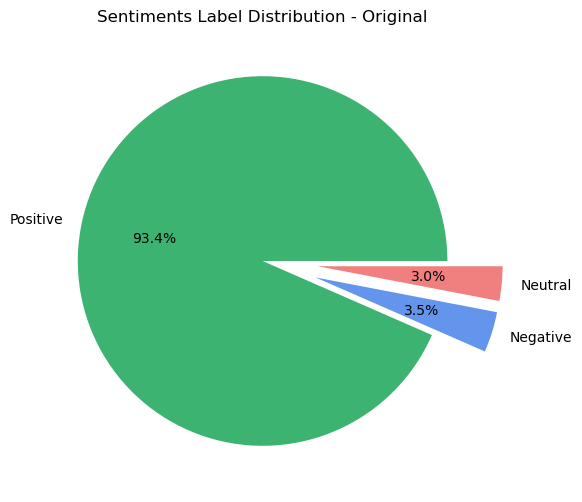

In [225]:
# Sentiments Label Distribution - Original

sorted_counts = dict(sorted(original_counts.items(), key=lambda item: item[1], reverse=True))
explode_values = [0, 0.3, 0.3]
colors = ['mediumseagreen', 'cornflowerblue', 'lightcoral']
fig, ax = plt.subplots(figsize=(11, 6))
ax.pie(sorted_counts.values(), labels=sorted_counts.keys(), colors=colors, autopct='%1.1f%%', explode=explode_values)
ax.set_title('Sentiments Label Distribution - Original')
ax.yaxis.set_visible(False)
plt.show()

In [230]:
# Apply Feature extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [231]:
# Oversampling to balance the data using minority to increase


sampler = RandomOverSampler(random_state=random_state)

# Resample the data
X_train_tfidf_resampled, y_train_resampled = sampler.fit_resample(X_train_tfidf, y_train)

# Print the number of samples in each set after resampling
print(f"# resampled samples: {len(y_train_resampled)}")

# Print the number of samples per class after resampling
resampled_counts = Counter(y_train_resampled)
print("Counter of resampled set", resampled_counts)

# resampled samples: 1581
Counter of resampled set Counter({'Positive': 527, 'Negative': 527, 'Neutral': 527})


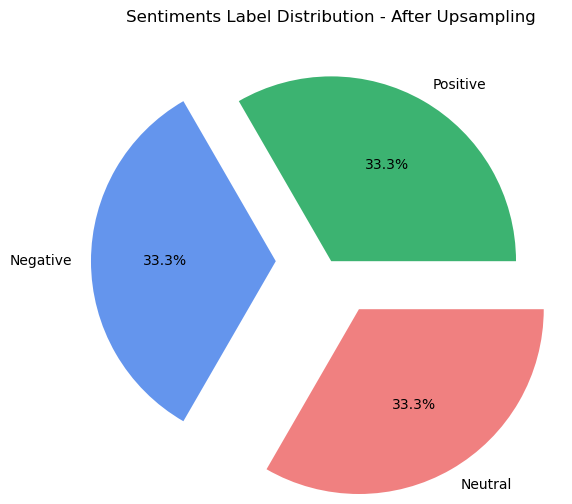

In [232]:
# Sentiments Label Distribution - After Upsampling

sorted_counts = dict(sorted(resampled_counts.items(), key=lambda item: item[1], reverse=True))
explode_values = [0, 0.3, 0.3]
colors = ['mediumseagreen', 'cornflowerblue', 'lightcoral']
fig, ax = plt.subplots(figsize=(11, 6))
ax.pie(sorted_counts.values(), labels=sorted_counts.keys(), colors=colors, autopct='%1.1f%%', explode=explode_values)
ax.set_title('Sentiments Label Distribution - After Upsampling')
ax.yaxis.set_visible(False)
plt.show()

# preprocessing for Lexican models

In [233]:
## Preprocessing steps for the validation 2000 reviews that are in X_val and Y_val

##Preprocessing for TextBlob
def preprocessing_text_for_textblob(text):
    try:
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
    except:
        pass

    try:
        # Remove special characters
        text = re.sub(r'[^\w\s]', '', text)
    except:
        pass

    # Remove digits
    text = re.sub(r'\d+', '', text)

    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Removing trailing whitespaces
    text = ' '.join([token for token in text.split()])

    # Handle the contractions
    expanded_text = contractions.fix(text)

    # Tokenization
    tokens = word_tokenize(expanded_text)

    # Stop words removal
    stop_words = set(stopwords.words('english'))
    custom_stopwords = stop_words - {'not', 'no', 'nor', 'but', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}
    filtered_tokens = [word for word in tokens if word.lower() not in custom_stopwords]

    # Join tokens back into text
    processed_text = ' '.join(filtered_tokens)

    return processed_text

In [234]:
##Preprocessing for Vader

def preprocessing_text_for_vader(text):
    try:
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
    except:
        pass
    return text

In [235]:
# Applying pre-processing

sample_df['text_preprocessed_for_textblob'] = sample_df['text'].apply(preprocessing_text_for_textblob)
sample_df['text_preprocessed_for_vader'] = sample_df['text'].apply(preprocessing_text_for_vader)
sample_df.head(20)

,overall,text,label,text_preprocessed_for_textblob,text_preprocessed_for_vader
2473,5.0,"Man, I wish Axe never got rid of this scent. It's really awesome. It's perfect for those Friday and Saturday nights that you're going out. A perfect blend of warm woods and leather, awesome fragrance. Party Like a Rockstar!",Positive,Man wish Axe never got rid scent really awesome perfect Friday Saturday nights going perfect blend warm woods leather awesome fragrance Party Like Rockstar,"Man, I wish Axe never got rid of this scent. It's really awesome. It's perfect for those Friday and Saturday nights that you're going out. A perfect blend of warm woods and leather, awesome fragrance. Party Like a Rockstar!"
5060,5.0,"Exelent product! Generous amount in the packaging, can be used all over the face. Will buy in the future. Like it",Positive,Exelent product Generous amount packaging used face buy future Like,"Exelent product! Generous amount in the packaging, can be used all over the face. Will buy in the future. Like it"
3258,5.0,100% natural and organic and performes much better than chemical counterparts for the same price. Met all my expectations,Positive,natural organic performes much better chemical counterparts price Met expectations,100% natural and organic and performes much better than chemical counterparts for the same price. Met all my expectations
5186,5.0,This soap is great! It has a nice smell that isn't too overwhelming. It is also sulfate free! This soap is wonderful!,Positive,soap great nice smell not overwhelming also sulfate free soap wonderful,This soap is great! It has a nice smell that isn't too overwhelming. It is also sulfate free! This soap is wonderful!
4724,1.0,"I bought this as I was really motivated by the commercials for this ""Optic White"" mouthwash. I was a victim of the promise. Maybe it does work, but seriously, this is NASTY stuff. NASTY. I would force myself to use it (white teeth=life's problems solved!), but then end up spitting it out short of ten seconds. I hate that I bought a four pack and am stuck with two unopened bottles.\n\nI'm not a wimp with flavors, but this is gross. Hate. Don't buy if you have taste buds!",Negative,bought really motivated commercials Optic White mouthwash victim promise Maybe work but seriously NASTY stuff NASTY would force use white teethlifes problems solved but end spitting short ten seconds hate bought four pack stuck two unopened bottles not wimp flavors but gross Hate Not buy taste buds,"I bought this as I was really motivated by the commercials for this ""Optic White"" mouthwash. I was a victim of the promise. Maybe it does work, but seriously, this is NASTY stuff. NASTY. I would force myself to use it (white teeth=life's problems solved!), but then end up spitting it out short of ten seconds. I hate that I bought a four pack and am stuck with two unopened bottles.\n\nI'm not a wimp with flavors, but this is gross. Hate. Don't buy if you have taste buds!"
3029,5.0,"I have had multiple surgeries on my feet that have left long scars and using Vitamin E gel -- ONLY the pure gel, not other lotions with Vitamin E in them -- has significantly enhanced the reduction of the scars so that you can hardly notice them. I continue to use this gel everyday even though my surgery was 2 years ago and it still helps. My scars are barely noticeable now. It also keeps my feet soft and smooth. Highly recommend this product! Best vitamin E gel ever!",Positive,multiple surgeries feet left long scars using Vitamin E gel pure gel not lotions Vitamin E significantly enhanced reduction scars hardly notice continue use gel everyday even though surgery years ago still helps scars barely noticeable also keeps feet soft smooth Highly recommend product Best vitamin E gel ever,"I have had multiple surgeries on my feet that have left long scars and using Vitamin E gel -- ONLY the pure gel, not other lotions with Vitamin E in them -- has significantly enhanced the reduction of the scars so that you 

In [236]:
# Applying pre-processing for validation sample

sample_df['text_preprocessed_for_ml'] = sample_df['text'].apply(preprocessing_text_for_ml)
sample_df.head(20)

,overall,text,label,text_preprocessed_for_textblob,text_preprocessed_for_vader,text_preprocessed_for_ml
2473,5.0,"Man, I wish Axe never got rid of this scent. It's really awesome. It's perfect for those Friday and Saturday nights that you're going out. A perfect blend of warm woods and leather, awesome fragrance. Party Like a Rockstar!",Positive,Man wish Axe never got rid scent really awesome perfect Friday Saturday nights going perfect blend warm woods leather awesome fragrance Party Like Rockstar,"Man, I wish Axe never got rid of this scent. It's really awesome. It's perfect for those Friday and Saturday nights that you're going out. A perfect blend of warm woods and leather, awesome fragrance. Party Like a Rockstar!",man wish axe never got rid scent really awesome perfect friday saturday night going perfect blend warm wood leather awesome fragrance party like rockstar
5060,5.0,"Exelent product! Generous amount in the packaging, can be used all over the face. Will buy in the future. Like it",Positive,Exelent product Generous amount packaging used face buy future Like,"Exelent product! Generous amount in the packaging, can be used all over the face. Will buy in the future. Like it",exelent product generous amount packaging used face buy future like
3258,5.0,100% natural and organic and performes much better than chemical counterparts for the same price. Met all my expectations,Positive,natural organic performes much better chemical counterparts price Met expectations,100% natural and organic and performes much better than chemical counterparts for the same price. Met all my expectations,natural organic performes much better chemical counterpart price met expectation
5186,5.0,This soap is great! It has a nice smell that isn't too overwhelming. It is also sulfate free! This soap is wonderful!,Positive,soap great nice smell not overwhelming also sulfate free soap wonderful,This soap is great! It has a nice smell that isn't too overwhelming. It is also sulfate free! This soap is wonderful!,soap great nice smell not overwhelming also sulfate free soap wonderful
4724,1.0,"I bought this as I was really motivated by the commercials for this ""Optic White"" mouthwash. I was a victim of the promise. Maybe it does work, but seriously, this is NASTY stuff. NASTY. I would force myself to use it (white teeth=life's problems solved!), but then end up spitting it out short of ten seconds. I hate that I bought a four pack and am stuck with two unopened bottles.\n\nI'm not a wimp with flavors, but this is gross. Hate. Don't buy if you have taste buds!",Negative,bought really motivated commercials Optic White mouthwash victim promise Maybe work but seriously NASTY stuff NASTY would force use white teethlifes problems solved but end spitting short ten seconds hate bought four pack stuck two unopened bottles not wimp flavors but gross Hate Not buy taste buds,"I bought this as I was really motivated by the commercials for this ""Optic White"" mouthwash. I was a victim of the promise. Maybe it does work, but seriously, this is NASTY stuff. NASTY. I would force myself to use it (white teeth=life's problems solved!), but then end up spitting it out short of ten seconds. I hate that I bought a four pack and am stuck with two unopened bottles.\n\nI'm not a wimp with flavors, but this is gross. Hate. Don't buy if you have taste buds!",bought really motivated commercial optic white mouthwash victim promise maybe work but seriously nasty stuff nasty would force use white teethlifes problem solved but end spitting short ten second hate bought four pack stuck two unopened bottle not wimp flavor but gross hate not buy taste bud
3029,5.0,"I have had multiple surgeries on my feet that have left long scars and using Vitamin E gel -- ONLY the pure gel, not other lotions with Vitamin E in them -- has significantly enhanced the reduction of the scars so that you can hardly notice them. I continue to use this gel everyday even though my surgery was 2 years ago and 

In [237]:
##Preprocessing for ML models

X_val_textblob = sample_df['text_preprocessed_for_textblob']
X_val_vader = sample_df['text_preprocessed_for_vader']
X_val_tfidf = tfidf.transform(sample_df['text_preprocessed_for_ml'])
y_val = sample_df['label']

print("Shape of DF data (X) (y):", X_val_tfidf.shape, y_val.shape)

Shape of DF data (X) (y): (200, 2868) (200,)


# Models 

In [238]:
# 10.b. Build two sentiment analysis models using 70% of the data.

In [239]:
# Model 1: Logistic Regression

lr_model = LogisticRegression(class_weight="balanced", max_iter=500)
lr_model.fit(X_train_tfidf_resampled, y_train_resampled)

# Model 2: Support Vector Machine (SVM)

svm_model = SVC(class_weight='balanced',  max_iter=10000)
svm_model.fit(X_train_tfidf_resampled, y_train_resampled)

# Model 3: Naive Bayes

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf_resampled, y_train_resampled)

# Model 4: Gradient Boosting

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_tfidf_resampled, y_train_resampled)

GradientBoostingClassifier()

In [240]:
print("Training Accuracy - Logistic Regression: ", lr_model.score(X_train_tfidf_resampled, y_train_resampled))
print("Training Accuracy - Support Vector Machine (SVM): ", svm_model.score(X_train_tfidf_resampled, y_train_resampled))
print("Training Accuracy - Naive Bayes: ", nb_model.score(X_train_tfidf_resampled, y_train_resampled))
print("Training Accuracy - Gradient Boosting: ", gb_model.score(X_train_tfidf_resampled, y_train_resampled))

Training Accuracy - Logistic Regression:  1.0
Training Accuracy - Support Vector Machine (SVM):  1.0
Training Accuracy - Naive Bayes:  0.9886148007590133
Training Accuracy - Gradient Boosting:  1.0


In [241]:
# 12. Testing: Test out the two models using the 30% test data note the accuracy, precision, recall and F1 score.

def model_evaluation(predictions, y_test):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    cnf_matrix = confusion_matrix(y_test, predictions)

    return accuracy, precision, recall, f1, cnf_matrix

In [242]:
# Test Model 1: Logistic Regression

#Make predictions on test data
lr_pred = lr_model.predict(X_test_tfidf)

lr_results = model_evaluation(lr_pred, y_test)

print("Test Model 1: Logistic Regression")
print("Accuracy: ", lr_results[0])
print("Precision: ", lr_results[1])
print("Recall: ", lr_results[2])
print("F1: ", lr_results[3])
print("Confusion Matrix: \n", lr_results[4])


Test Model 1: Logistic Regression
Accuracy:  0.9300411522633745
Precision:  0.920914337070148
Recall:  0.9300411522633745
F1:  0.9239331904546139
Confusion Matrix: 
 [[  3   0   6]
 [  2   1   4]
 [  0   5 222]]


In [243]:
# Test Model 2: Support Vector Machine (SVM)

#Make predictions on test data
svm_pred = svm_model.predict(X_test_tfidf)

svm_results = model_evaluation(svm_pred, y_test)

print("Test Model 2: Support Vector Machine (SVM)")
print("Accuracy: ", svm_results[0])
print("Precision: ", svm_results[1])
print("Recall: ", svm_results[2])
print("F1: ", svm_results[3])
print("Confusion Matrix: \n", svm_results[4])

Test Model 2: Support Vector Machine (SVM)
Accuracy:  0.9382716049382716
Precision:  0.9050607080910111
Recall:  0.9382716049382716
F1:  0.9114809550132934
Confusion Matrix: 
 [[  0   0   9]
 [  0   1   6]
 [  0   0 227]]


C:\Users\chitr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [244]:
# Test Model 3: Naive Bayes

#Make predictions on test data
nb_pred = nb_model.predict(X_test_tfidf)

nb_results = model_evaluation(nb_pred, y_test)

print("Test Model 3: Naive Bayes")
print("Accuracy: ", nb_results[0])
print("Precision: ", nb_results[1])
print("Recall: ", nb_results[2])
print("F1: ", nb_results[3])
print("Confusion Matrix: \n", nb_results[4])

Test Model 3: Naive Bayes
Accuracy:  0.8847736625514403
Precision:  0.9419329690987808
Recall:  0.8847736625514403
F1:  0.9069996776089967
Confusion Matrix: 
 [[  7   0   2]
 [  2   4   1]
 [  8  15 204]]


In [245]:
# Test Model 4: Gradient Boosting

#Make predictions on test data
gb_pred = gb_model.predict(X_test_tfidf)

gb_results = model_evaluation(gb_pred, y_test)

print("Test Model 4: Gradient Boosting")
print("Accuracy: ", gb_results[0])
print("Precision: ", gb_results[1])
print("Recall: ", gb_results[2])
print("F1: ", gb_results[3])
print("Confusion Matrix: \n", gb_results[4])

Test Model 4: Gradient Boosting
Accuracy:  0.9218106995884774
Precision:  0.9172318363972901
Recall:  0.9218106995884774
F1:  0.919229658508411
Confusion Matrix: 
 [[  3   0   6]
 [  1   2   4]
 [  5   3 219]]


# Comparison betweem Lexican Model VS ML models

In [246]:
# 13. Design an experiment to compare the test results of the Lexicon model versus the two machine learning models:

In [247]:
# Function to get sentiment from polarity for TextBlob

def get_sentiment_text_byTextBlob(text):
    text_analyzer = TextBlob(text)
    sentiment_score = text_analyzer.sentiment.polarity

    if -0.2 <= sentiment_score <= 0.2:
        return 'Neutral'
    elif sentiment_score > 0.2:
        return 'Positive'
    else:
        return 'Negative'

# Function to get sentiment from polarity for Vader

def get_sentiment_text_byVader(text):
    text_analyzer = SentimentIntensityAnalyzer()
    sentiment_score = text_analyzer.polarity_scores(text)['compound']

    if -0.2 <= sentiment_score <= 0.2:
        return 'Neutral'
    elif sentiment_score > 0.2:
        return 'Positive'
    else:
        return 'Negative'

In [248]:
# Get the prediction values from the Lexicon models


In [249]:
# Test Lexicon Model 1: TextBlob

# TextBlob Lexicon Model
textblob_pred = [get_sentiment_text_byTextBlob(text) for text in X_val_textblob]

textblob_results = model_evaluation(textblob_pred, y_val)

print("Test Lexicon Model 1: TextBlob")
print("Accuracy: ", textblob_results[0])
print("Precision: ", textblob_results[1])
print("Recall: ", textblob_results[2])
print("F1: ", textblob_results[3])
print("Confusion Matrix: \n", textblob_results[4])

Test Lexicon Model 1: TextBlob
Accuracy:  0.75
Precision:  0.9363455782312926
Recall:  0.75
F1:  0.8231120615911035
Confusion Matrix: 
 [[  1   6   0]
 [  0   4   2]
 [  2  40 145]]


In [250]:
# Test Lexicon Model 2: Vader

# Vader Lexicon Model
vader_pred = [get_sentiment_text_byVader(text) for text in X_val_vader]

vader_results = model_evaluation(vader_pred, y_val)

print("Test Lexicon Model 2: Vader")
print("Accuracy: ", vader_results[0])
print("Precision: ", vader_results[1])
print("Recall: ", vader_results[2])
print("F1: ", vader_results[3])
print("Confusion Matrix: \n", vader_results[4])

Test Lexicon Model 2: Vader
Accuracy:  0.915
Precision:  0.9300923913043477
Recall:  0.915
F1:  0.9221410429193448
Confusion Matrix: 
 [[  3   2   2]
 [  2   1   3]
 [  1   7 179]]


In [251]:
# Test ML Model 1: Logistic Regression

#Make predictions on test data
lr_pred = lr_model.predict(X_val_tfidf)

lr_results = model_evaluation(lr_pred, y_val)

print("Test Model 1: Logistic Regression")
print("Accuracy: ", lr_results[0])
print("Precision: ", lr_results[1])
print("Recall: ", lr_results[2])
print("F1: ", lr_results[3])
print("Confusion Matrix: \n", lr_results[4])


Test Model 1: Logistic Regression
Accuracy:  0.93
Precision:  0.916171875
Recall:  0.93
F1:  0.9216560326217318
Confusion Matrix: 
 [[  2   0   5]
 [  1   1   4]
 [  1   3 183]]


In [252]:
# Test ML Model 2: Support Vector Machine (SVM)

#Make predictions on test data
svm_pred = svm_model.predict(X_val_tfidf)

svm_results = model_evaluation(svm_pred, y_val)

print("Test Model 2: Support Vector Machine (SVM)")
print("Accuracy: ", svm_results[0])
print("Precision: ", svm_results[1])
print("Recall: ", svm_results[2])
print("F1: ", svm_results[3])
print("Confusion Matrix: \n", svm_results[4])

Test Model 2: Support Vector Machine (SVM)
Accuracy:  0.94
Precision:  0.9086180904522613
Recall:  0.94
F1:  0.9145040710584752
Confusion Matrix: 
 [[  0   0   7]
 [  0   1   5]
 [  0   0 187]]


C:\Users\chitr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# State of the Art Model

4.3 Rating profile—enhancing ratings with reviews In another sub-branch of research, investigators assume that both reviews and real ratings are available in a particular scenario, in which reviews act as an auxiliary resource to enhance ratings. Some of these approaches stress that using reviews can be helpful for dealing with the cold-start problem, since relying on only a few ratings provided by new users might prevent the recommender from returning satisfactory results (McAuley and Leskovec 2013; Seroussi et al. 2011)

We are choosing “Rating Profile - Inferring Ratings from Reviews” approach for implementation.

Diagram Concept:

1. Review Text Input: Input reviews from users.
2. Sentiment Analysis: Perform sentiment analysis on each review.
3. Infer Ratings: Convert sentiment scores to a rating scale (e.g., 1-5).
4. Aggregate Ratings: Combine these inferred ratings with existing numerical ratings.

In [253]:
sample_df.head()

,overall,text,label,text_preprocessed_for_textblob,text_preprocessed_for_vader,text_preprocessed_for_ml
2473,5.0,"Man, I wish Axe never got rid of this scent. It's really awesome. It's perfect for those Friday and Saturday nights that you're going out. A perfect blend of warm woods and leather, awesome fragrance. Party Like a Rockstar!",Positive,Man wish Axe never got rid scent really awesome perfect Friday Saturday nights going perfect blend warm woods leather awesome fragrance Party Like Rockstar,"Man, I wish Axe never got rid of this scent. It's really awesome. It's perfect for those Friday and Saturday nights that you're going out. A perfect blend of warm woods and leather, awesome fragrance. Party Like a Rockstar!",man wish axe never got rid scent really awesome perfect friday saturday night going perfect blend warm wood leather awesome fragrance party like rockstar
5060,5.0,"Exelent product! Generous amount in the packaging, can be used all over the face. Will buy in the future. Like it",Positive,Exelent product Generous amount packaging used face buy future Like,"Exelent product! Generous amount in the packaging, can be used all over the face. Will buy in the future. Like it",exelent product generous amount packaging used face buy future like
3258,5.0,100% natural and organic and performes much better than chemical counterparts for the same price. Met all my expectations,Positive,natural organic performes much better chemical counterparts price Met expectations,100% natural and organic and performes much better than chemical counterparts for the same price. Met all my expectations,natural organic performes much better chemical counterpart price met expectation
5186,5.0,This soap is great! It has a nice smell that isn't too overwhelming. It is also sulfate free! This soap is wonderful!,Positive,soap great nice smell not overwhelming also sulfate free soap wonderful,This soap is great! It has a nice smell that isn't too overwhelming. It is also sulfate free! This soap is wonderful!,soap great nice smell not overwhelming also sulfate free soap wonderful
4724,1.0,"I bought this as I was really motivated by the commercials for this ""Optic White"" mouthwash. I was a victim of the promise. Maybe it does work, but seriously, this is NASTY stuff. NASTY. I would force myself to use it (white teeth=life's problems solved!), but then end up spitting it out short of ten seconds. I hate that I bought a four pack and am stuck with two unopened bottles.\n\nI'm not a wimp with flavors, but this is gross. Hate. Don't buy if you have taste buds!",Negative,bought really motivated commercials Optic White mouthwash victim promise Maybe work but seriously NASTY stuff NASTY would force use white teethlifes problems solved but end spitting short ten seconds hate bought four pack stuck two unopened bottles not wimp flavors but gross Hate Not buy taste buds,"I bought this as I was really motivated by the commercials for this ""Optic White"" mouthwash. I was a victim of the promise. Maybe it does work, but seriously, this is NASTY stuff. NASTY. I would force myself to use it (white teeth=life's problems solved!), but then end up spitting it out short of ten seconds. I hate that I bought a four pack and am stuck with two unopened bottles.\n\nI'm not a wimp with flavors, but this is gross. Hate. Don't buy if you have taste buds!",bought really motivated commercial optic white mouthwash victim promise maybe work but seriously nasty stuff nasty would force use white teethlifes problem solved but end spitting short ten second hate bought four pack stuck two unopened bottle not wimp flavor but gross hate not buy taste bud


In [254]:
text_df.head()

,overall,text,label,text_preprocessed
576,5.0,It was just what I wanted. Five Stars,Positive,wanted five star
1344,5.0,Unexpectedly good. The best smelling shower gel I have ever used. A little bit on the sweet side. But not chemical Wow,Positive,unexpectedly good best smelling shower gel ever used little bit sweet side but not chemical wow
1197,5.0,"Would definitely buy it again/ Always get lots of compliments whenever I wear it. Now, I just need to find more cologne before it runs out. Love it!",Positive,would definitely buy always get lot compliment whenever wear need find cologne run love
3980,5.0,I have been wearing for years while I am on stage (and off stage). I wish it were still in stores. Thank you! Love it - thank you,Positive,wearing year stage stage wish still store thank love thank
2992,5.0,"wonderful stuff ,,great shower cream , better than any other i have tried for mild oily skin .the large is the best value and last a lot longer than i thought awesome product worth the money",Positive,wonderful stuff great shower cream better tried mild oily skin large best value last lot longer thought awesome product worth money


In [255]:
# Get the new X, y Values

text_df_sota_X = text_df['text_preprocessed']
text_df_sota_y = text_df['overall']
# 10.a. Split the data into 70% for training and 30% for testing

X_train_sota, X_test_sota, y_train_sota, y_test_sota = train_test_split(text_df_sota_X, text_df_sota_y, test_size=0.3, stratify=text_df_sota_y, random_state=random_state)

print("Shape of training data (X) (y):", X_train_sota.shape, y_train_sota.shape)
print("Shape of testing data (X) (y):", X_test_sota.shape, y_test_sota.shape)

Shape of training data (X) (y): (564,) (564,)
Shape of testing data (X) (y): (243,) (243,)


In [256]:
# Apply Feature extraction using TF-IDF

tfidf_sota = TfidfVectorizer()
X_train_sota_tfidf = tfidf_sota.fit_transform(X_train_sota)
X_test_sota_tfidf = tfidf_sota.transform(X_test_sota)

X_val_sota_tfidf = tfidf_sota.transform(sample_df['text_preprocessed_for_ml'])
y_val_sota = sample_df['overall']

print("Shape of DF data (X) (y):", X_val_tfidf.shape, y_val.shape)
print("Shape of Validation data (X) (y):", X_val_sota_tfidf.shape, y_val_sota.shape)

sampled_counts_sota = Counter(y_train_sota)
print("Counter of original sampled set", sampled_counts_sota)

Shape of DF data (X) (y): (200, 2868) (200,)
Shape of Validation data (X) (y): (200, 2902) (200,)
Counter of original sampled set Counter({5.0: 479, 4.0: 48, 3.0: 17, 1.0: 13, 2.0: 7})


In [257]:
# Oversampling to balance the data using minority to increase

sampler_sota = RandomOverSampler(random_state=random_state)

# Resample the data
X_train_sota_tfidf_resampled, y_train_sota_resampled = sampler_sota.fit_resample(X_train_sota_tfidf, y_train_sota)

# Print the number of samples in each set after resampling
print(f"# resampled samples: {len(y_train_sota_resampled)}")

# Print the number of samples per class after resampling
resampled_counts_sota = Counter(y_train_sota_resampled)
print("Counter of resampled set", resampled_counts_sota)

# resampled samples: 2395
Counter of resampled set Counter({5.0: 479, 4.0: 479, 2.0: 479, 3.0: 479, 1.0: 479})


In [258]:
# Model 1: Logistic Regression

lr_model_sota = LogisticRegression(class_weight="balanced", max_iter=500)
lr_model_sota.fit(X_train_sota_tfidf_resampled, y_train_sota_resampled)

# Model 2: Support Vector Machine (SVM)

svm_model_sota = SVC(class_weight='balanced',  max_iter=10000)
svm_model_sota.fit(X_train_sota_tfidf_resampled, y_train_sota_resampled)

SVC(class_weight='balanced', max_iter=10000)

In [259]:
print("Accuracy - Logistic Regression: ", lr_model_sota.score(X_train_sota_tfidf_resampled, y_train_sota_resampled))
print("Accuracy - Support Vector Machine (SVM): ", svm_model_sota.score(X_train_sota_tfidf_resampled, y_train_sota_resampled))

Accuracy - Logistic Regression:  0.9987473903966597
Accuracy - Support Vector Machine (SVM):  1.0


In [260]:
# Predicting ratings using Linear Regression model
inferred_rating_lr = lr_model_sota.predict(X_test_sota_tfidf)
inferred_rating_svm = svm_model_sota.predict(X_test_sota_tfidf)

In [261]:
best_weights = None
lowest_mse = float('inf')  # Initialize the lowest MSE with a very high value

# Grid search for weights
for alpha in range(0, 11):
    svm_weight = alpha / 10
    lr_weight = 1 - svm_weight

    # Combine predictions using a linear combination
    enhanced_rating = (svm_weight * inferred_rating_svm) + (lr_weight * inferred_rating_lr)

    # Calculate MSE
    mse = mean_squared_error(y_test_sota, enhanced_rating)

    # Check if this MSE is the lowest found so far
    if mse < lowest_mse:
        lowest_mse = mse
        best_weights = (svm_weight, lr_weight)

print("Best Weights:", best_weights)

Best Weights: (0.3, 0.7)


In [262]:
# Combine predictions using a linear combination
# You can adjust the weights according to your needs
enhanced_rating = (0.4 * inferred_rating_svm) + (0.6 * inferred_rating_lr)

# Evaluate the performance of combined predictions if you have ground truth for test ratings
# You can use metrics like Mean Squared Error (MSE) or Root Mean Squared Error (RMSE)

mse = mean_squared_error(y_test_sota, enhanced_rating)
print("MSE on the testing data:", mse)

MSE on the testing data: 0.522798353909465


In [263]:
# Predicting ratings using SVM and Gradient Boost model
inferred_rating_lr = lr_model_sota.predict(X_val_sota_tfidf)
inferred_rating_svm = svm_model_sota.predict(X_val_sota_tfidf)
#inferred_rating_gb = gb_model_sota.predict(X_val_sota_tfidf)

# Combine predictions using a linear combination
enhanced_rating = (0.4 * inferred_rating_svm) + (0.6 * inferred_rating_lr)


# Evaluate the performance of combined predictions on the ground truth for test ratings
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val_sota, enhanced_rating)
print("MSE on the separate 200 reviews:", mse)

MSE on the separate 200 reviews: 0.40940000000000004


In [264]:
sample_df['enhanced_rating'] = enhanced_rating.round().astype(int)
sample_df['enhaced_label'] = sample_df['enhanced_rating'].apply(label_rating)

sample_df

,overall,text,label,text_preprocessed_for_textblob,text_preprocessed_for_vader,text_preprocessed_for_ml,enhanced_rating,enhaced_label
2473,5.0,"Man, I wish Axe never got rid of this scent. It's really awesome. It's perfect for those Friday and Saturday nights that you're going out. A perfect blend of warm woods and leather, awesome fragrance. Party Like a Rockstar!",Positive,Man wish Axe never got rid scent really awesome perfect Friday Saturday nights going perfect blend warm woods leather awesome fragrance Party Like Rockstar,"Man, I wish Axe never got rid of this scent. It's really awesome. It's perfect for those Friday and Saturday nights that you're going out. A perfect blend of warm woods and leather, awesome fragrance. Party Like a Rockstar!",man wish axe never got rid scent really awesome perfect friday saturday night going perfect blend warm wood leather awesome fragrance party like rockstar,5,Positive
5060,5.0,"Exelent product! Generous amount in the packaging, can be used all over the face. Will buy in the future. Like it",Positive,Exelent product Generous amount packaging used face buy future Like,"Exelent product! Generous amount in the packaging, can be used all over the face. Will buy in the future. Like it",exelent product generous amount packaging used face buy future like,5,Positive
3258,5.0,100% natural and organic and performes much better than chemical counterparts for the same price. Met all my expectations,Positive,natural organic performes much better chemical counterparts price Met expectations,100% natural and organic and performes much better than chemical counterparts for the same price. Met all my expectations,natural organic performes much better chemical counterpart price met expectation,5,Positive
5186,5.0,This soap is great! It has a nice smell that isn't too overwhelming. It is also sulfate free! This soap is wonderful!,Positive,soap great nice smell not overwhelming also sulfate free soap wonderful,This soap is great! It has a nice smell that isn't too overwhelming. It is also sulfate free! This soap is wonderful!,soap great nice smell not overwhelming also sulfate free soap wonderful,5,Positive
4724,1.0,"I bought this as I was really motivated by the commercials for this ""Optic White"" mouthwash. I was a victim of the promise. Maybe it does work, but seriously, this is NASTY stuff. NASTY. I would force myself to use it (white teeth=life's problems solved!), but then end up spitting it out short of ten seconds. I hate that I bought a four pack and am stuck with two unopened bottles.\n\nI'm not a wimp with flavors, but this is gross. Hate. Don't buy if you have taste buds!",Negative,bought really motivated commercials Optic White mouthwash victim promise Maybe work but seriously NASTY stuff NASTY would force use white teethlifes problems solved but end spitting short ten seconds hate bought four pack stuck two unopened bottles not wimp flavors but gross Hate Not buy taste buds,"I bought this as I was really motivated by the commercials for this ""Optic White"" mouthwash. I was a victim of the promise. Maybe it does work, but seriously, this is NASTY stuff. NASTY. I would force myself to use it (white teeth=life's problems solved!), but then end up spitting it out short of ten seconds. I hate that I bought a four pack and am stuck with two unopened bottles.\n\nI'm not a wimp with flavors, but this is gross. Hate. Don't buy if you have taste buds!",bought really motivated commercial optic white mouthwash victim promise maybe work but seriously nasty stuff nasty would force use white teethlifes problem solved but end spitting short ten second hate bought four pack stuck two unopened bottle not wimp flavor but gross hate not buy taste bud,4,Positive
...,...,...,...,...,...,...,...,...
4477,5.0,"I love this scent, and it's no longer being made.\nI'm always on the hunt for ""something like it.""\nIt reminds me of the 70's fragrance, ""Golden Autumn"", also not being made any more.\nToday's scents h

In [265]:
pd.set_option('display.max_colwidth', None)  # To display the full content of columns without truncation
sample_df[['overall',  'enhanced_rating', 'label', 'enhaced_label', 'text',]].sample(20)

,overall,enhanced_rating,label,enhaced_label,text
4192,4.0,4,Positive,Positive,"I'm reviewing the dried lavender blossoms. The scent is wonderful, so long as you like the scent of lavender -- and I do. I mix this with some dried flower petals and use it as potpourri in the restroom. It's not an immediately overwhelming scent, but when you walk into the room, it smells very nice. In the fall, I'm going to mix it with some ground cloves.\n\nI'd give this five stars if it were just a bit less expensive. It's not overpriced, but it's not a steal, either. Overall, though, I'm happy with it. Potpourri material"
4727,5.0,5,Positive,Positive,"This is scientology of personal hygiene equipments. Everyone outside looks at it as a crazy contraption, but every owner is LOVING it! This is scientology of personal hygiene equipments. Everyone outside ..."
4239,2.0,3,Negative,Neutral,"The shampoo is very watery, and I did not see too much of a difference in my dandruff. Meh"
2373,5.0,5,Positive,Positive,"Love Love Love, Very hard to find Five Stars"
4133,5.0,5,Positive,Positive,"This is a great and versatile product!\n\nI use it for cooking, mainly baking, in some salads and also on my skin and hair!\n\nHowever, I would like to note that I CAN taste it in the dishes, especially fried ones. So if you do not like coconut flavor on your meat/chicken/veggies consider frying with something else. I love this oil!"
393,5.0,5,Positive,Positive,The best hair product ever I love it
2347,5.0,5,Positive,Positive,Great Five Stars
1839,5.0,5,Positive,Positive,"gave the shower gel for a Christmas gift, she said she loved it, thanks rvv. she said she loved it, thanks rvv"
3669,5.0,5,Positive,Positive,Thank you Five Stars
535,5.0,5,Positive,Positive,My granddaughter loves the fragrance. Great fragrance


In [275]:
df = load_data("C:/Users/chitr/OneDrive - Centennial College/Attachment Winter 2024/COMP 262/Project/All_Beauty_5.json.gz")
df['reviewLength'] = df['reviewText'].apply(lambda x: len(str(x)))

In [289]:
!pip install tensorflow




[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [290]:
print(df[df.reviewLength > 100])

      overall  verified   reviewTime      reviewerID        asin  \
1         5.0      True  11 14, 2013  A3H7T87S984REU  B0000530HU   
2         1.0      True  08 18, 2013  A3J034YH7UG4KT  B0000530HU   
3         5.0     False   05 3, 2011  A2UEO5XR3598GI  B0000530HU   
4         5.0      True   05 6, 2011  A3SFRT223XXWF7  B00006L9LC   
5         5.0     False  05 16, 2010  A24HQ2N7332W7W  B00006L9LC   
...       ...       ...          ...             ...         ...   
5257      5.0      True  01 24, 2016  A1MDYWL5DLS9SS  B019LAI4HU   
5259      5.0      True  05 19, 2017  A2JPQVFMKT94M2  B019V2KYZS   
5260      5.0      True   05 4, 2017   AKQ9DH3HRPHW3  B019V2KYZS   
5264      5.0      True  08 23, 2018   AUX122XW8ONG6  B01DLR9IDI   
5266      5.0      True  08 23, 2018   AUX122XW8ONG6  B01DLR9IDI   

                                                     style  \
1     {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice Blue'}   
2     {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice Blue'} 

In [291]:
greater_df = df[df.reviewLength > 100]
sample = greater_df.sample(n=10)
print(sample['reviewText'].values)

["I would give it 5 stars but it is way over priced! My hair is looking better and seems to be healthier but I am using the Reflection Chroma Thermique also so who knows which one is working or if it is the combination..I won't pay that price again, if it were cheaper I would keep using it but I am not going to keep using it at that price..Now that my hair is in better shape I think it will be okay, I had damaged it using bleach.."
 "I purchased this lotion in December 2013 while Christmas shopping.  I fell in love with it right away.  This is the nicest scented body lotion I've found in many years.  I absolutely adore it.  I let a female friend of mine try it but told her up front not to ask for it because it's one item I would not be giving away.  I am trying to use it sparingly so as not to use it up too quickly.  Sadly, I returned to the store that I purchased it from but they did not have anymore.  Each time I visit that store, I always check to see if more of this wonderful lotio

In [292]:
for i in sample['reviewText'].values:
    generator = pipeline("text-generation",max_new_tokens=50)
    prompt = i + "\n\nNew review \n" 
    outputs = generator(prompt)
    print(outputs[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


RuntimeError: Failed to import transformers.models.gpt2.modeling_tf_gpt2 because of the following error (look up to see its traceback):
DLL load failed while importing _errors: The specified procedure could not be found.

In [295]:
question_df = df['reviewText'].values
print(question_df.dtype)

question_list = []
for i in question_df:
    question = str(i)
    if question.endswith('?'):
        question_list.append(question)
print(question_list)

object
["Smells great with out the allergy issues.  I wish I didn't have to have required number of words.  What more can I say about soap?", 'Really like the nice mild fragrance.  Cannot find this Old Spice Body Wash Foxcrest on the local retail shelves for some unknown reason???', 'Really like the nice mild fragrance.  Cannot find this Old Spice Body Wash Foxcrest on the local retail shelves for some unknown reason???', 'Really like the nice mild fragrance.  Cannot find this Old Spice Body Wash Foxcrest on the local retail shelves for some unknown reason???', "Smells great with out the allergy issues.  I wish I didn't have to have required number of words.  What more can I say about soap?", "I don't think I've ever had a real sponge like this before, and it's great for having my back scrubbed. It does not irritate my skin, and it feels good. There's one side effect I hadn't thought of - the cat attacked it like it was alive and he was determined to kill it. I had to take it away from

In [296]:
text= question_list[0]
print(text)


Smells great with out the allergy issues.  I wish I didn't have to have required number of words.  What more can I say about soap?


In [297]:
reader = pipeline("question-answering")
question = question_list[1]
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

C:\Users\chitr\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\chitr\.cache\huggingface\hub\models--distilbert--distilbert-base-cased-distilled-squad. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


RuntimeError: Failed to import transformers.models.distilbert.modeling_tf_distilbert because of the following error (look up to see its traceback):
DLL load failed while importing _errors: The specified procedure could not be found.